In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid

/Users/anton/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


We ran an experiment with a plate loaded with two dilutions of red food colouring, and distilled water. The plate layout was a row of food colouring, a row of 1:10 food colouring, and a row of water, repeating over down the plate. We measured A490 every 25 minutes, dispensing 12 µL of ddH2O into every other column.

In [98]:
labels = pd.DataFrame(np.zeros((8,12)), index=['A','B','C','D','E','F','G','H'], columns=range(1,13), dtype=np.str)
labels.loc[::3,::2] = "1:1 D"
labels.loc[::3,2::2] = "1:1 ND"
labels.loc['B'::3,::2] = "1:10 D"
labels.loc['B'::3,2::2] = "1:10 ND"
labels.loc['C'::3,::2] = "H2O D"
labels.loc['C'::3,2::2] = "H2O ND"

In [155]:
labels

1        2       3        4       5        6       7        8       9   \
A   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   
B  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D   
C   H2O D   H2O ND   H2O D   H2O ND   H2O D   H2O ND   H2O D   H2O ND   H2O D   
D   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   
E  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D   
F   H2O D   H2O ND   H2O D   H2O ND   H2O D   H2O ND   H2O D   H2O ND   H2O D   
G   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   1:1 ND   1:1 D   
H  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D  1:10 ND  1:10 D   

        10      11       12  
A   1:1 ND   1:1 D   1:1 ND  
B  1:10 ND  1:10 D  1:10 ND  
C   H2O ND   H2O D   H2O ND  
D   1:1 ND   1:1 D   1:1 ND  
E  1:10 ND  1:10 D  1:10 ND  
F   H2O ND   H2O D   H2O ND  
G   1:1 ND   1:1 D   1:1 ND  
H  1:10 ND  1:10 D  1:10 ND

In [151]:
evap_data = pd.read_excel('./20161116-Evaporation Test8.xls')
evap_data_t0 = pd.read_excel('./20161116-Evaporation Test T01.xls')
evap_data_t12h = pd.read_excel('./20161116-Evaporation Test T02.xls')

labels_long = labels.stack().rename_axis(["Row","Column"]).rename('Label').reset_index()
labels_long["Well"] = labels_long.loc[:,'Row':'Column'].apply(lambda x: "{:s}{:02g}".format(*x), axis=1)
evap_data = pd.merge(evap_data, labels_long, on=['Well'])

evap_data_t0 = pd.merge(evap_data_t0, labels_long, on="Well")
evap_data_t0['Timepoint'] = "0"
evap_data_t12h = pd.merge(evap_data_t12h, labels_long, on="Well")
evap_data_t12h['Timepoint'] = "20"

WARNING *** file size (151834) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (20608) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (20608) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [46]:
evap_data.ix[evap_data['Well'].str[0] == "A",'Sample'] = "1:1"
evap_data.ix[evap_data['Well'].str[0] == "B",'Sample'] = "1:10"
evap_data.ix[evap_data['Well'].str[0] == "C",'Sample'] = "H2O"
evap_data.ix[evap_data['Well'].str[0] == "D",'Sample'] = "1:1"
evap_data.ix[evap_data['Well'].str[0] == "E",'Sample'] = "1:10"
evap_data.ix[evap_data['Well'].str[0] == "F",'Sample'] = "H2O"
evap_data.ix[evap_data['Well'].str[0] == "G",'Sample'] = "1:1"
evap_data.ix[evap_data['Well'].str[0] == "H",'Sample'] = "1:10"

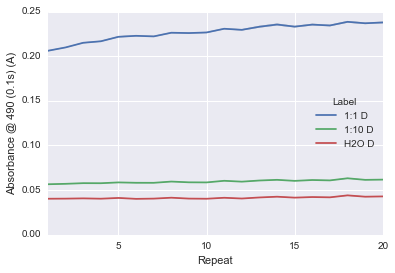

In [142]:
sns.tsplot(data=evap_data, time="Repeat", condition="Label", unit="Well", value='Absorbance @ 490 (0.1s) (A)')

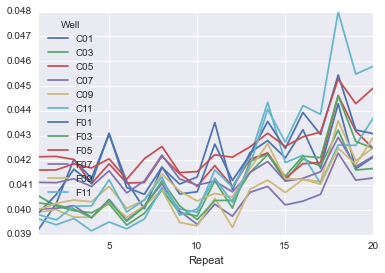

In [192]:
evap_data[evap_data['Label'] == 'H2O D'].pivot(index='Repeat', columns='Well', values='Absorbance @ 490 (0.1s) (A)').plot()

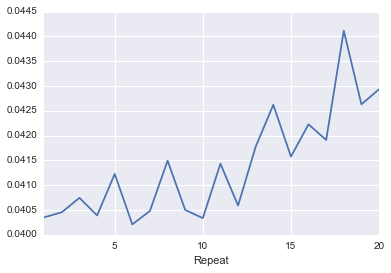

In [196]:
evap_data[evap_data['Label'] == 'H2O D'].pivot(index='Repeat', columns='Well', values='Absorbance @ 490 (0.1s) (A)').mean(axis=1).plot()

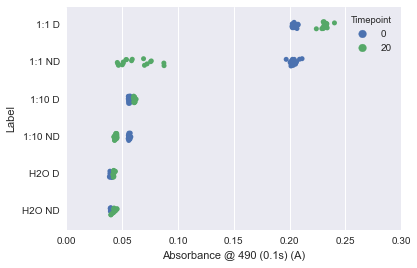

In [154]:
sns.stripplot(x='Absorbance @ 490 (0.1s) (A)', y='Label', hue="Timepoint", jitter=True, data=evap_data_t0.append(evap_data_t12h))

In [62]:
evap_data_noh2o = pd.read_excel("./20161116-Evaporation Test No Dispense1.xls")
evap

WARNING *** file size (79986) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


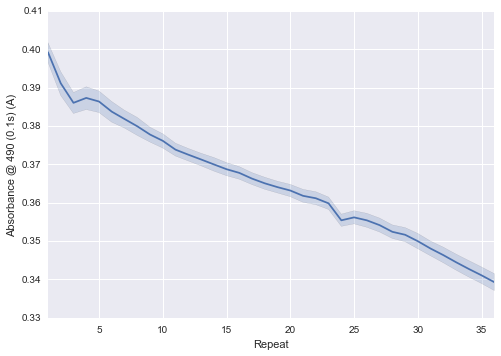

In [65]:
sns.tsplot(data=evap_data_noh2o, time="Repeat", unit="Well", value='Absorbance @ 490 (0.1s) (A)')

# H<sub>2</sub>O Evaporation

Filled a plate with 8 wells x 200 µL of ddH<sub>2</sub>O, in the corners and center. Weighed and ran on plate reader reading absorbance every 10 minutes for 30 minute increments at 37ºC. Weighed again after each 30 minute run.

In [14]:
from StringIO import StringIO

water_evap_data = pd.read_csv(StringIO('''
Time,Weight
15:57:49, 41.97
16:28:22, 41.91
16:59:50, 41.78
17:32:21, 41.69
18:04:47, 41.61
18:37:05, 41.55
'''))

In [15]:
water_evap_data['Time'] = pd.to_datetime(water_evap_data['Time'])
water_evap_data['Time'] = pd.to_datetime(water_evap_data['Time'] - water_evap_data.ix[0, 'Time'])

# water_evap_data['Weight'] -= water_evap_data.ix[0, 'Weight']

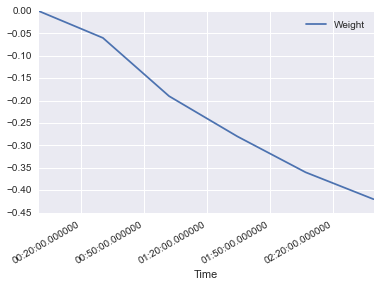

In [250]:
water_evap_data.plot(x='Time')

In [25]:
water_evap_change = water_evap_data.ix[[0,5]].diff().ix[5]
water_evap_change['Weight'] / water_evap_change['Time'].seconds / 8 * 60 * 1000

-0.32963583089158777

In [274]:
water_evap_data.diff().iloc[1:]

Time  Weight
1 00:30:33   -0.06
2 00:31:28   -0.13
3 00:32:31   -0.09
4 00:32:26   -0.08
5 00:32:18   -0.06

# Second Evaporation Experiment

LB in 96 wells, OD a fluorescence measurements, no shaking.

In [26]:
import datetime as dt

start_weight = 59.86
end_weight = 46.05

start_time = "20161120 23:58:28"
end_time = "20161121 14:58:32"

evap_rate = (start_weight - end_weight) / 96 / (pd.to_datetime(end_time) - pd.to_datetime(start_time)).seconds
print evap_rate * 60 * 1000, "ul/min/well"

0.159826123991 ul/min/well


This doesn't compare great to the results reported by Canton (0.48 ul/min) and Elowitz (0.29 ul/min).

## Third Evap Experiment

Ran experiment with 96 x 200 ul wells of LB, with shaking. Protocol was OD600 and GFP measurements (as above), followed by 8 minutes of shaking, double orbit, normal speed, 1 mm.

Ran overnight, but the machine protocol stopped running approx 4 hours before the plate got weighed.

In [28]:
import datetime as dt

start_weight = 59.75
end_weight = 42.92

start_time = "20161201 18:25:30"
# end_time = "20161202 07:30:00" # Est actual finish time
end_time = "20161202 11:12:22"

evap_rate = (start_weight - end_weight) / 96 / (pd.to_datetime(end_time) - pd.to_datetime(start_time)).seconds
print evap_rate * 60 * 1000, "ul/min/well"

0.223470363289 ul/min/well


## Fourth Evap Experiment

Same as above, with shaking, but run for less time. No gap at the end.

In [29]:
start_weight = 59.70
end_weight = 52.88

start_time = "20161202 11:48:28"
# end_time = "20161202 07:30:00" # Est actual finish time
end_time = "20161202 17:14:21"

evap_rate = (start_weight - end_weight) / 96 / (pd.to_datetime(end_time) - pd.to_datetime(start_time)).seconds
print evap_rate * 60 * 1000, "ul/min/well"

0.217997238275 ul/min/well


Using this figure to calculate injection rate for plate reader; we can do min 5 ul injections.

In [34]:
5 / (evap_rate * 60 * 1000)

22.93607038123167

# MG1655 Growth and Evaporation Test
*3 December 2016*

Grew up 5 mL culture of *E. coli* MG1655 overnight, to OD 1.3. Backdiluted at 1:100 into 20 mL LB and plated into 88 wells of 96-well plate, with media blank on a diagonal running right-down from A1. Monitored overnight in plate reader with following settings:

* OD600
* Shake 9 minutes
* OD600
* Shake 3 minutes 45 seconds
* Dispense 5 ul ddH2O per well.
* Shake 2 minutes

All shaking was at 1 mm, normal speed, double orbit. ddH2O was dispensed using full-syringe mode.

In [135]:
import platereader
gd = platereader.load_victor3('./20161202-OD600 Timecourse1.xls')

WARNING *** file size (1061443) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [136]:
labels = '''
Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655
'''

labels = platereader.labels_from_tsv(labels)
labels

1       2       3       4       5       6       7       8       9   \
A   Blank  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655   
B  MG1655   Blank  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655   
C  MG1655  MG1655   Blank  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655   
D  MG1655  MG1655  MG1655   Blank  MG1655  MG1655  MG1655  MG1655  MG1655   
E  MG1655  MG1655  MG1655  MG1655   Blank  MG1655  MG1655  MG1655  MG1655   
F  MG1655  MG1655  MG1655  MG1655  MG1655   Blank  MG1655  MG1655  MG1655   
G  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655   Blank  MG1655  MG1655   
H  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655  MG1655   Blank  MG1655   

       10      11      12  
A  MG1655  MG1655  MG1655  
B  MG1655  MG1655  MG1655  
C  MG1655  MG1655  MG1655  
D  MG1655  MG1655  MG1655  
E  MG1655  MG1655  MG1655  
F  MG1655  MG1655  MG1655  
G  MG1655  MG1655  MG1655  
H  MG1655  MG1655  MG1655

In [137]:
gd = platereader.label(gd, labels)

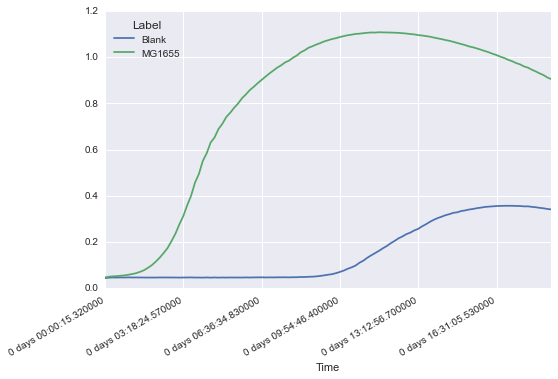

In [141]:
gd.groupby(['Label', 'Time'])['Data'].agg(np.mean).unstack(0).plot()

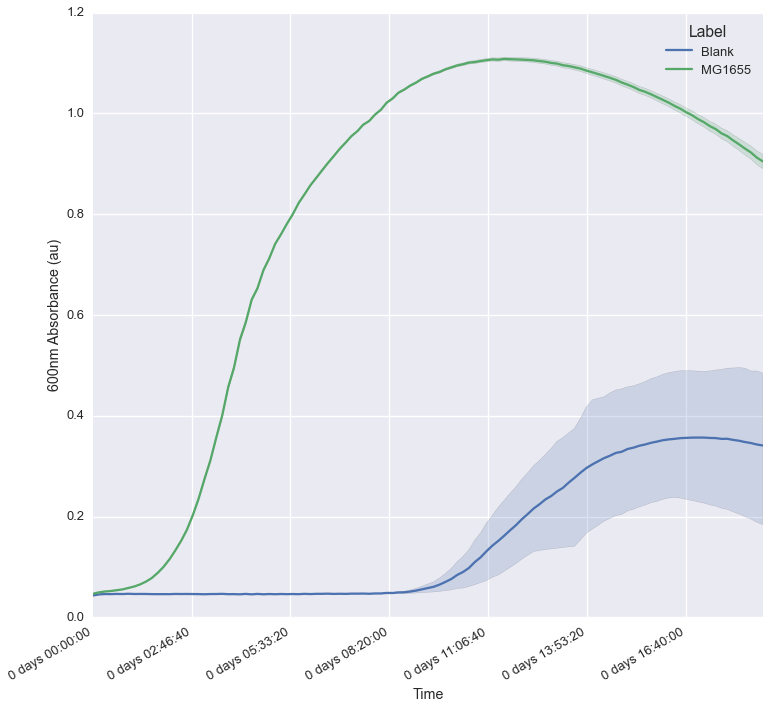

In [182]:
sns.set_context("talk")
platereader.plot(gd)
plt.ylabel('600nm Absorbance (au)')
plt.savefig('./20161202-od600-timecourse-plot.png')

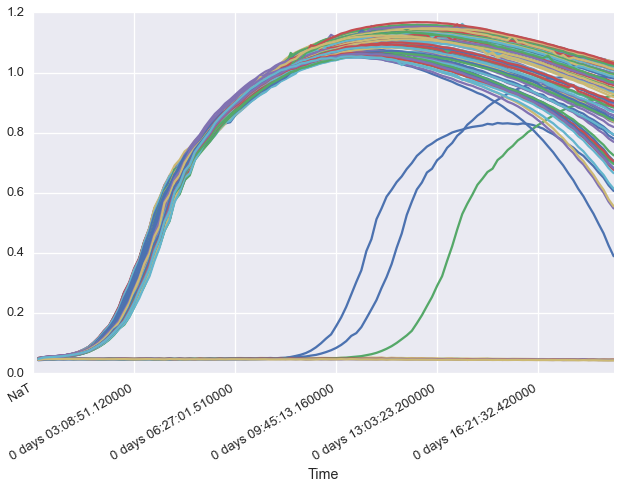

In [183]:
plt.figure(figsize=(12,12))
gd.pivot('Time', 'Well', 'Data').plot(legend=False)
plt.savefig('./20161202-od600-timecourse-all-wells.png')

We can see contamination rising in three of the blank wells :/. This could be due to shaking and open wells, or contamination from the dispenser.

We also measured the weight at the beginning and end to calibrate evaporation again.

In [147]:
start_weight = 59.71
end_weight = 50.12

start_time = "20161202 18:09:23"
end_time = "20161203 13:05:27"

evap_rate = (start_weight - end_weight) / 96 / (pd.to_datetime(end_time) - pd.to_datetime(start_time)).seconds
print evap_rate * 60 * 1000, "ul/min/well"

0.0879313127164 ul/min/well


In [173]:
evap_rate * 60 * 1000 * 23

2.022420192476968

So apparently we want to add another 2 ul of liquid per well per 23 minutes. We can use the raw data to figure out how long the cycle actually went for:

In [166]:
rd = pd.read_excel("./20161202-OD600 Timecourse1.xls")
rd['Time'] = pd.to_timedelta(rd['Time'].astype(str))
times = pd.to_timedelta(rd.groupby('Well')['Time'].transform(np.diff))
times.describe()

WARNING *** file size (1061443) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


count                      5568
mean     0 days 00:19:49.012553
std      0 days 00:00:00.280178
min      0 days 00:19:48.610000
25%      0 days 00:19:48.810000
50%      0 days 00:19:48.950000
75%      0 days 00:19:49.120000
max      0 days 00:19:50.100000
Name: Time, dtype: object

So really we were adding 5 ul every 19:49. Calculating how much more we should add again:

In [167]:
evap_rate * 60 * 1000 * (19 + 49./60)

1.742505513663127

We have to use integer amounts, so calculate the time gap we would need for 7 ul.

In [172]:
7 / (5 / (19 + 49./60) + evap_rate * 60 * 1000) # minutes

20.57345987861172

In [177]:
0.57345 * 60

34.407000000000004

So we'll do 20 minutes, 34 seconds. We need to add 45 seconds to our current protocol.

# Growth Test 2
*5-6 December 2016*

Protocol as above, adjusted to run for 20:34 per repeat and dispense 7 ul. MG1655 grown to OD 1.18 and backdiluted 1:100. Plated with MG1655 in every second row, blank in every other.

*6 December 2016*

We see differential evaporation; wells at the edge of the plate are low and wells in the top middle are very (over) full.

In [184]:
gd2 = platereader.load_victor3('./20161206-OD600 Timecourse2.xls')
gd2_labels = platereader.blank_plate_labels()
gd2_labels[::2] = "MG1655"
gd2_labels[1::2] = "Blank"
gd2 = platereader.label(gd2, gd2_labels)

WARNING *** file size (793414) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [188]:
gd2.tail()

Plate  Repeat  MeasurementCount Well Type            Time  \
8251      1      39                78  H12    M 13:14:38.610000   
8252      1      40                80  H12    M 13:35:16.670000   
8253      1      41                82  H12    M 13:55:54.740000   
8254      1      42                84  H12    M 14:16:33.140000   
8255      1      43                86  H12    M 14:37:11.450000   

            RealTime Measurement      Data  Label  
8251 13:15:30.830000   OD600 (A)  1.004939  Blank  
8252 13:36:08.890000   OD600 (A)  1.024733  Blank  
8253 13:56:47.020000   OD600 (A)  1.047294  Blank  
8254 14:17:25.380000   OD600 (A)  1.059206  Blank  
8255 14:38:03.690000   OD600 (A)  1.070489  Blank

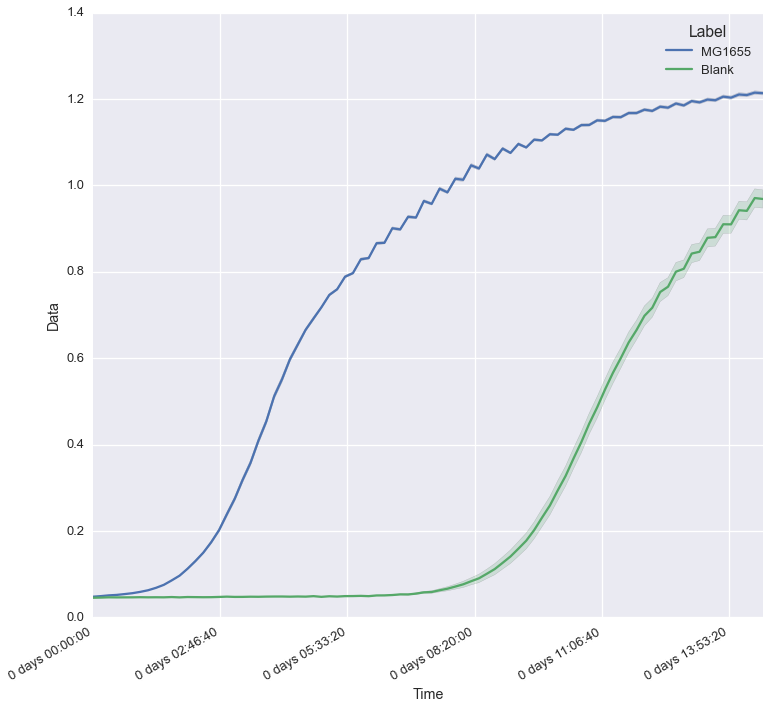

In [190]:
platereader.plot(gd2)

Well
A1     Axes(0.125,0.2;0.775x0.7)
A10    Axes(0.125,0.2;0.775x0.7)
A11    Axes(0.125,0.2;0.775x0.7)
A12    Axes(0.125,0.2;0.775x0.7)
A2     Axes(0.125,0.2;0.775x0.7)
A3     Axes(0.125,0.2;0.775x0.7)
A4     Axes(0.125,0.2;0.775x0.7)
A5     Axes(0.125,0.2;0.775x0.7)
A6     Axes(0.125,0.2;0.775x0.7)
A7     Axes(0.125,0.2;0.775x0.7)
A8     Axes(0.125,0.2;0.775x0.7)
A9     Axes(0.125,0.2;0.775x0.7)
B1     Axes(0.125,0.2;0.775x0.7)
B10    Axes(0.125,0.2;0.775x0.7)
B11    Axes(0.125,0.2;0.775x0.7)
B12    Axes(0.125,0.2;0.775x0.7)
B2     Axes(0.125,0.2;0.775x0.7)
B3     Axes(0.125,0.2;0.775x0.7)
B4     Axes(0.125,0.2;0.775x0.7)
B5     Axes(0.125,0.2;0.775x0.7)
B6     Axes(0.125,0.2;0.775x0.7)
B7     Axes(0.125,0.2;0.775x0.7)
B8     Axes(0.125,0.2;0.775x0.7)
B9     Axes(0.125,0.2;0.775x0.7)
C1     Axes(0.125,0.2;0.775x0.7)
C10    Axes(0.125,0.2;0.775x0.7)
C11    Axes(0.125,0.2;0.775x0.7)
C12    Axes(0.125,0.2;0.775x0.7)
C2     Axes(0.125,0.2;0.775x0.7)
C3     Axes(0.125,0.2;0.775x0.7)
     

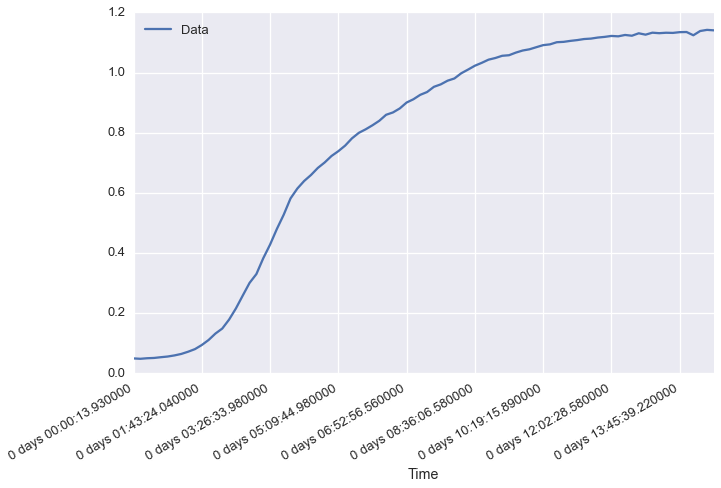

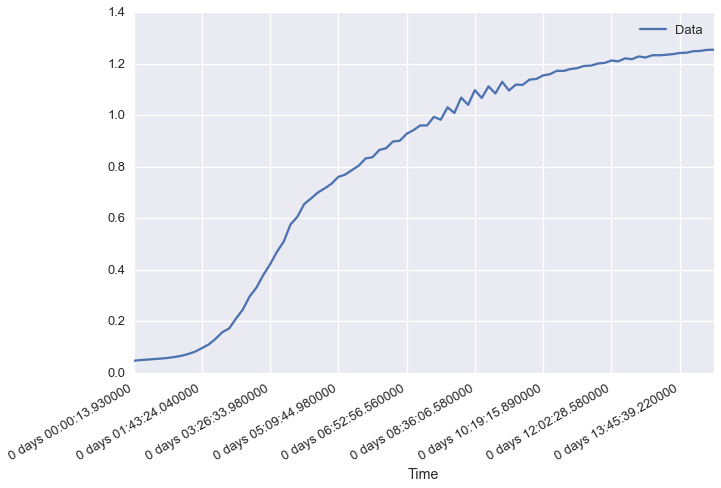

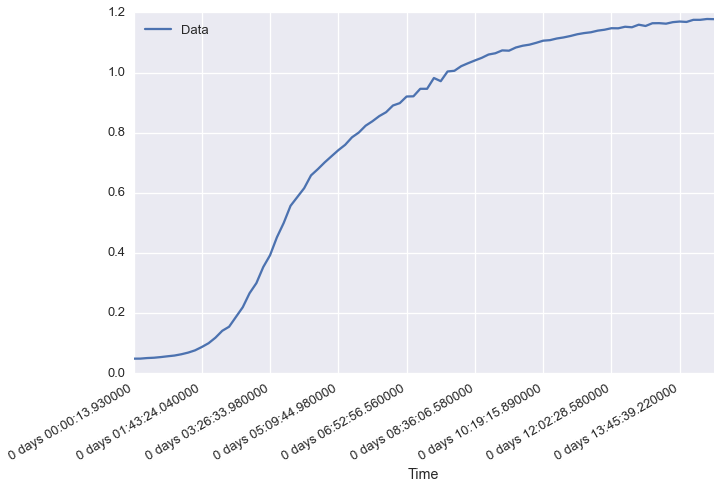

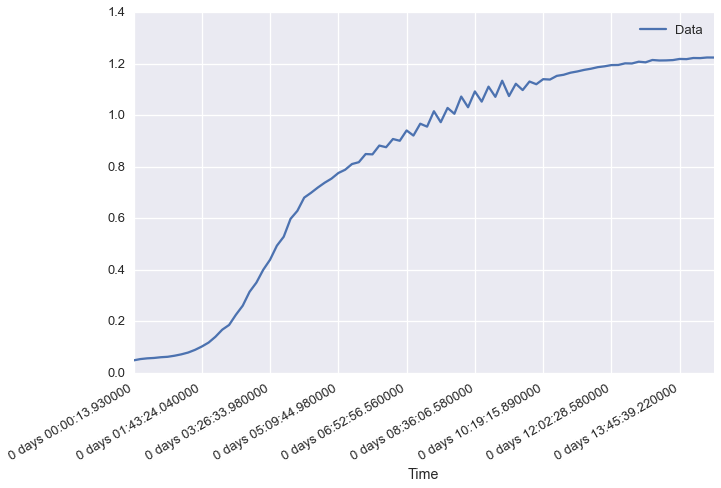

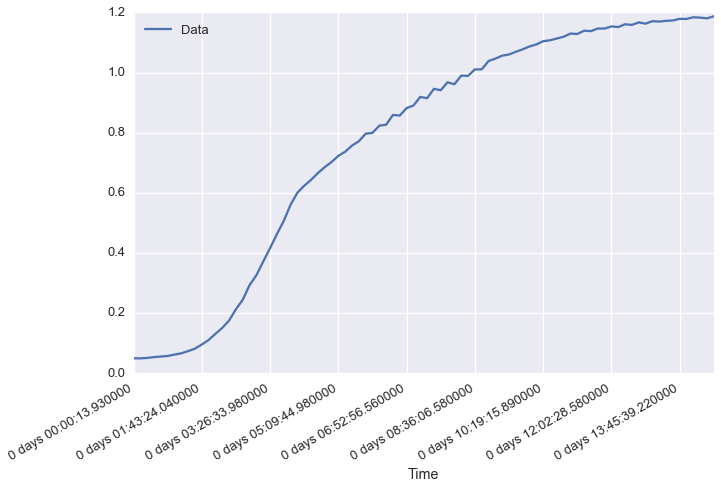

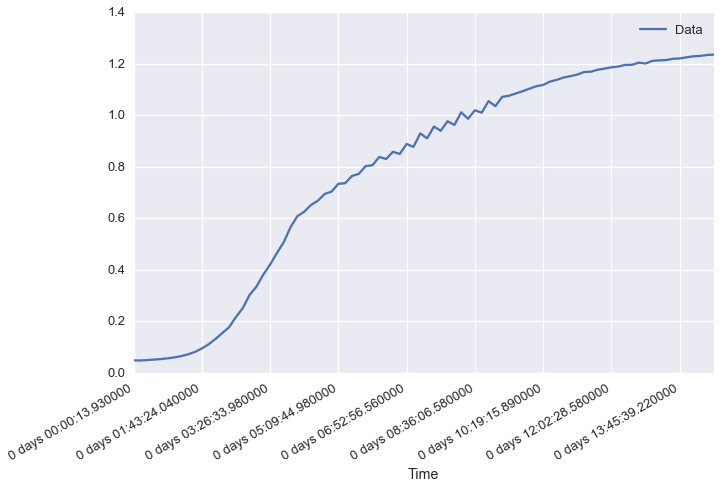

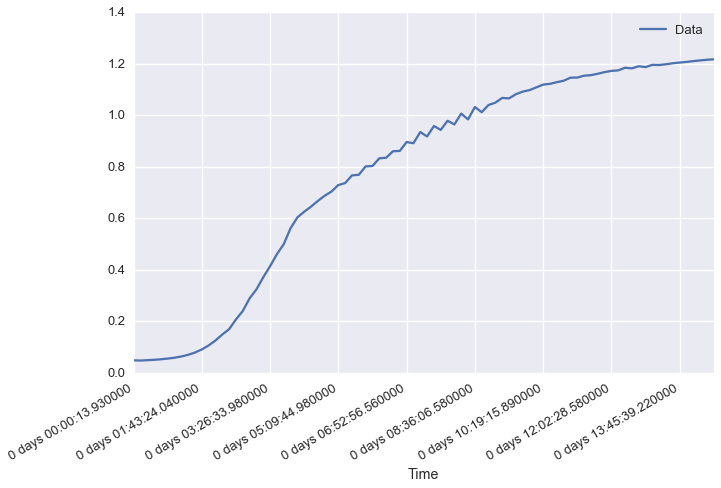

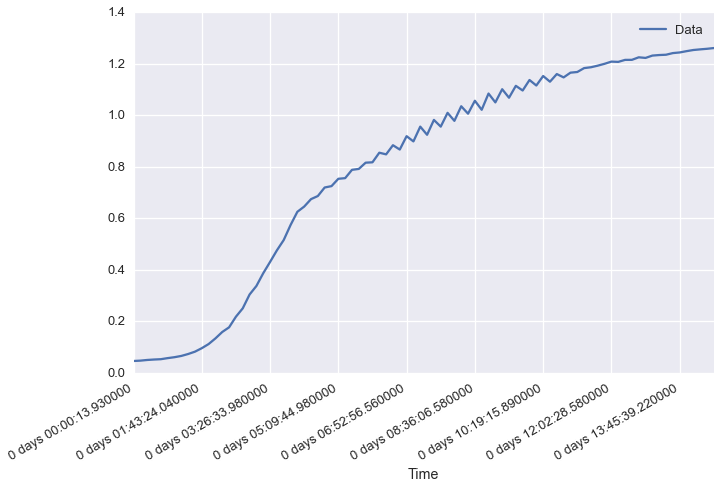

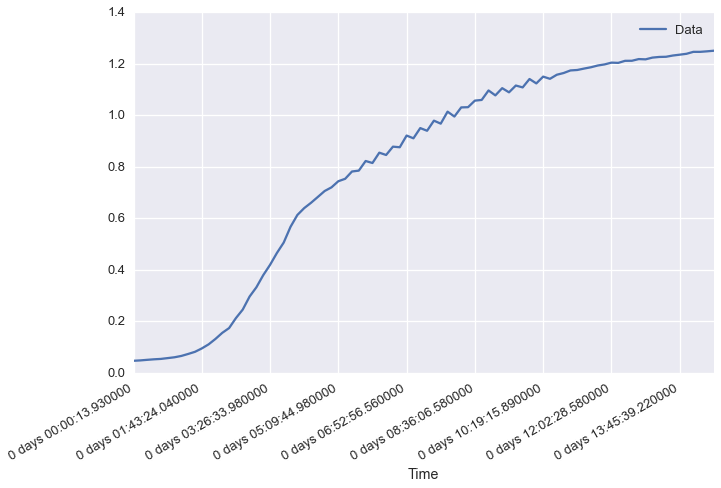

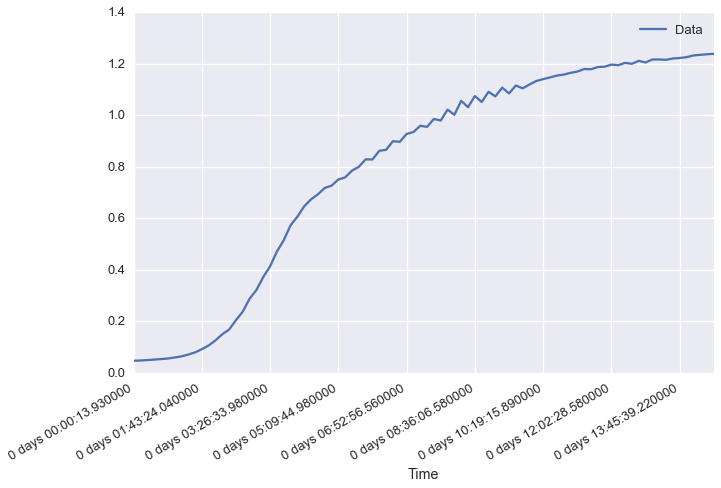

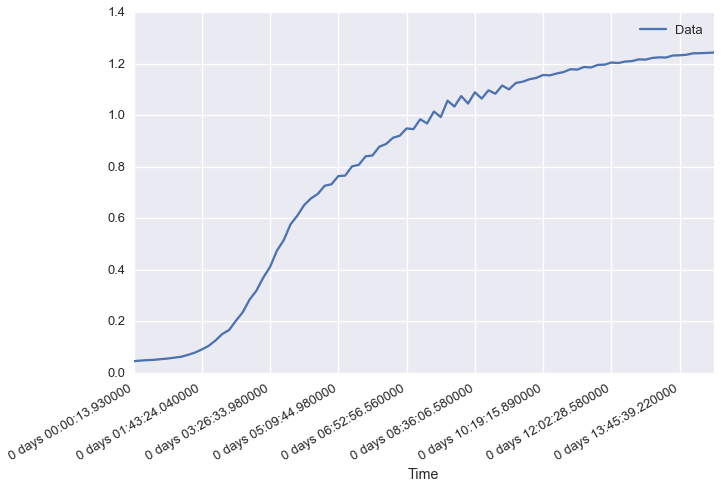

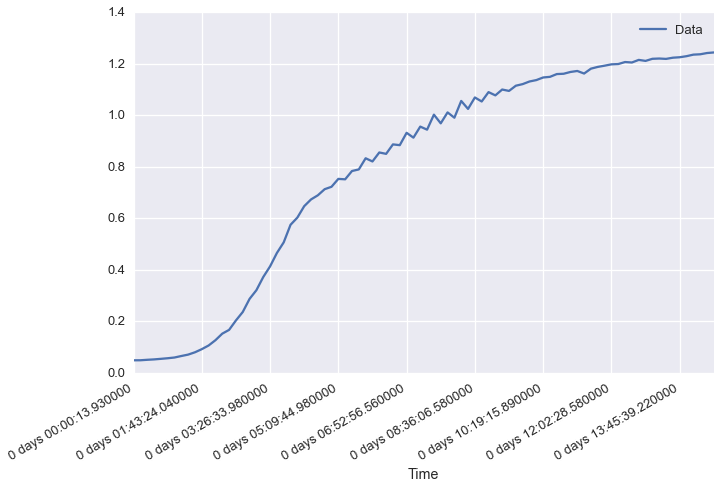

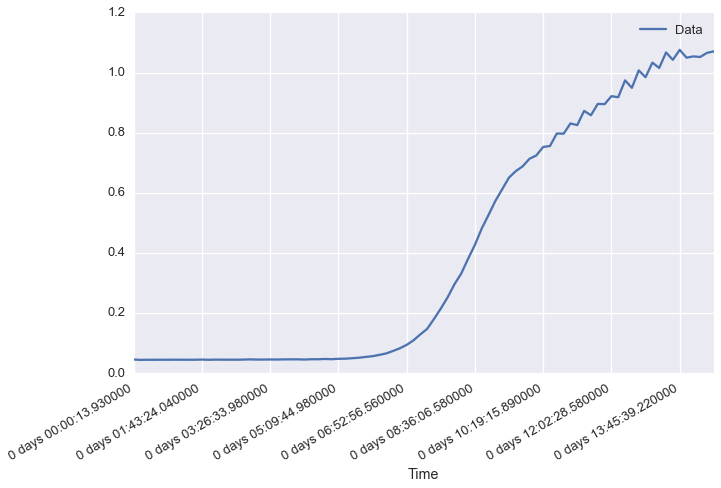

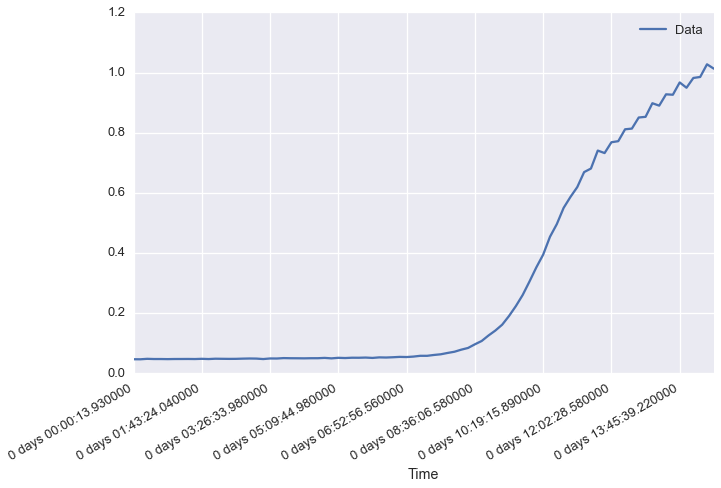

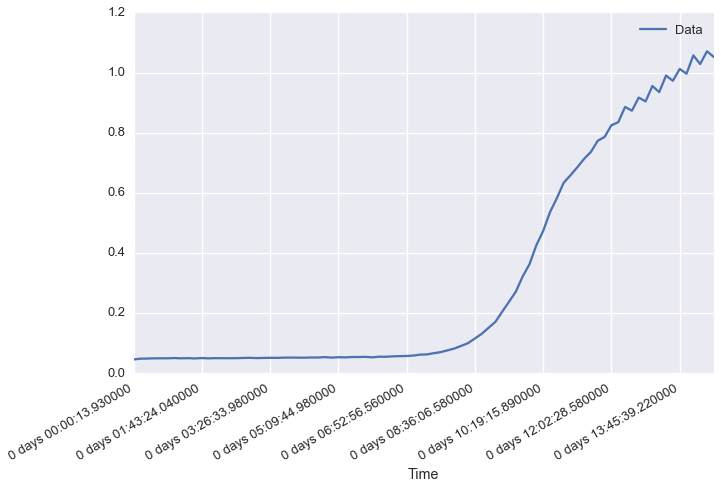

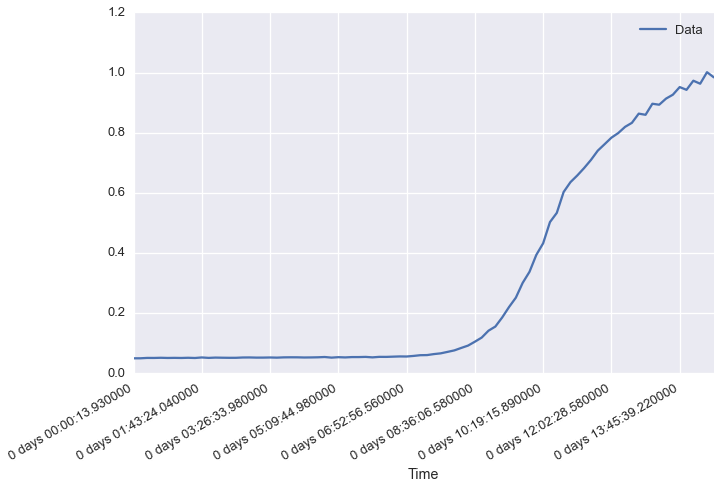

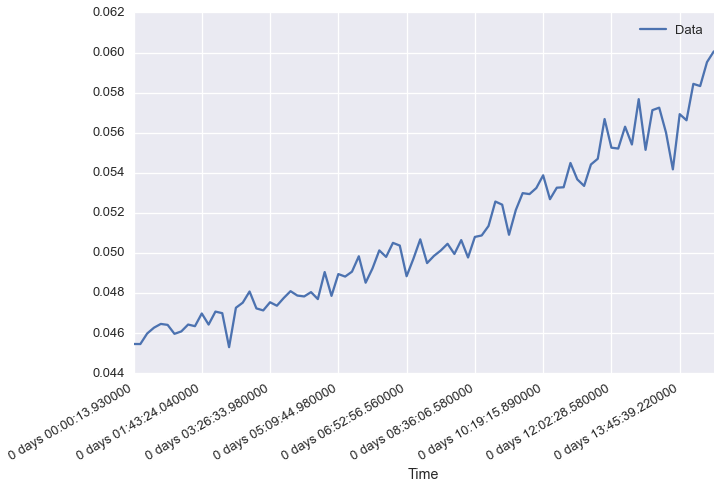

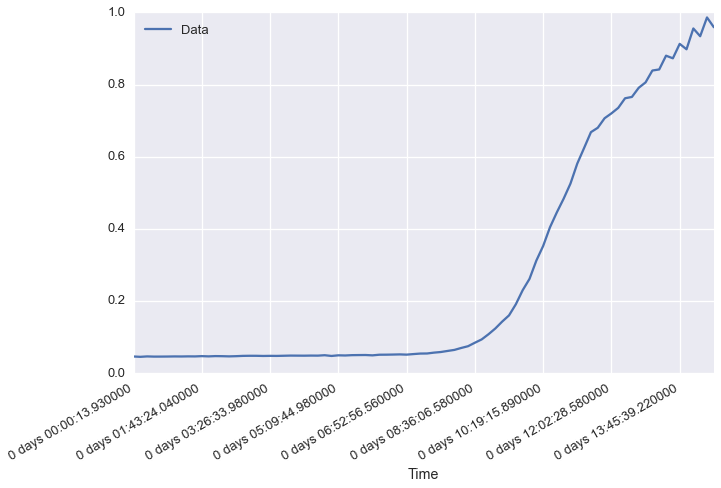

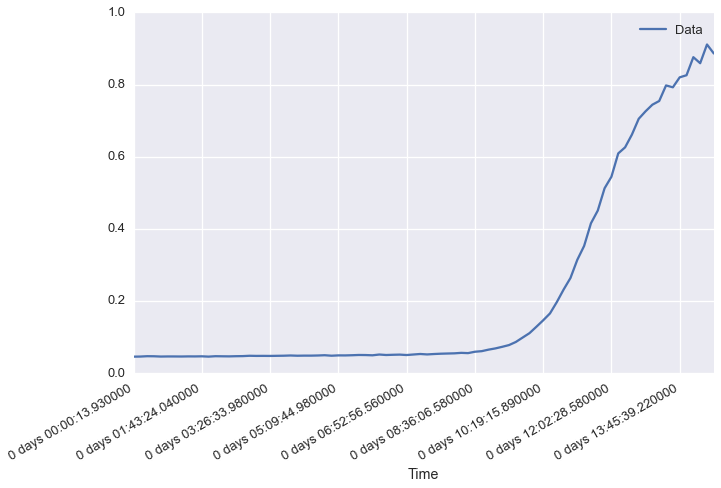

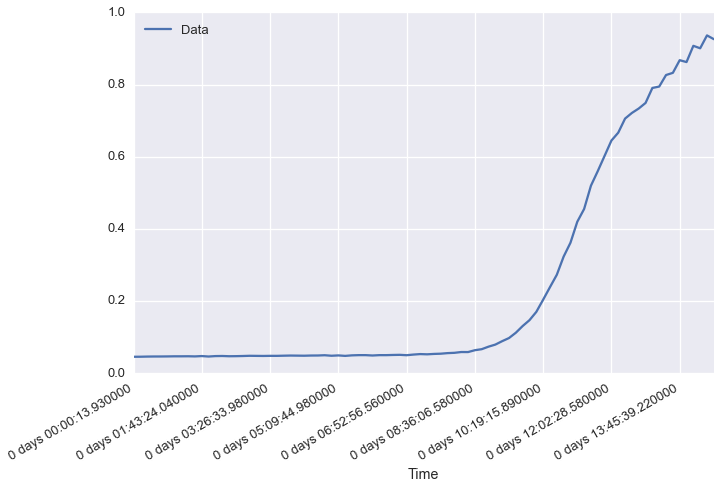

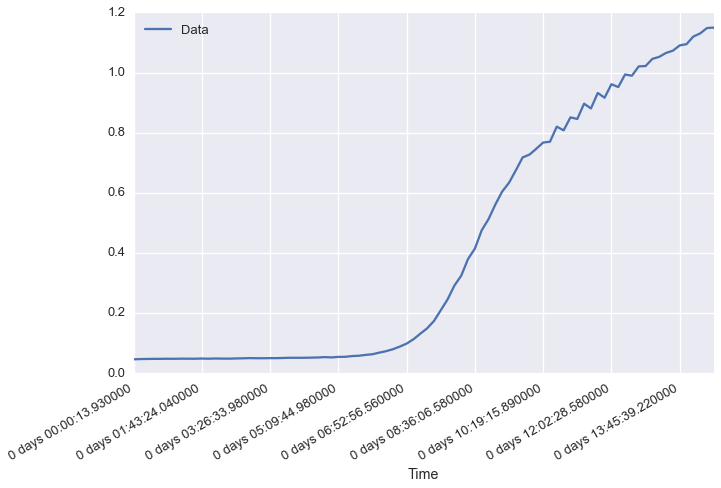

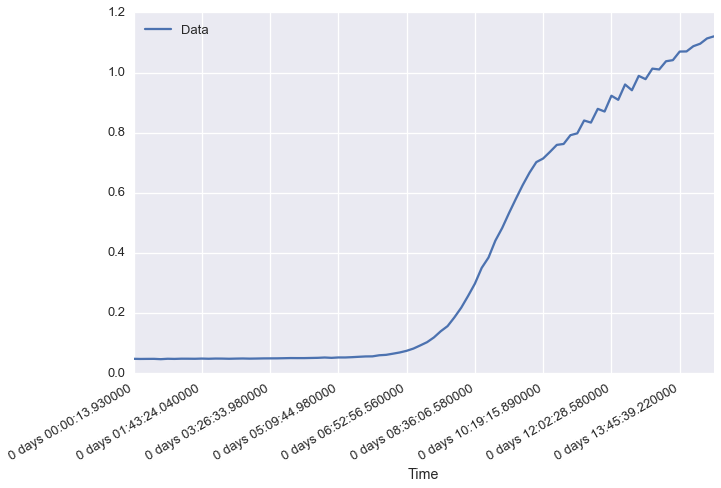

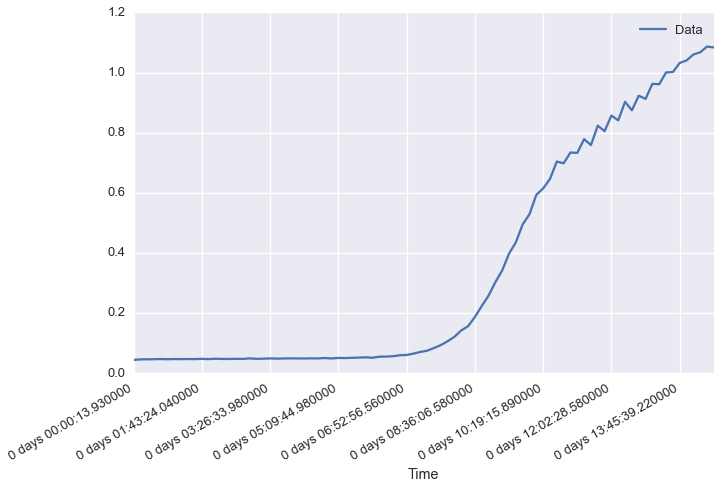

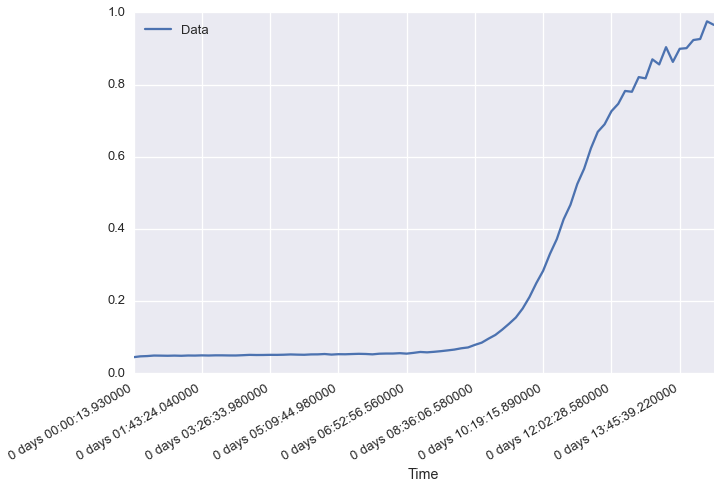

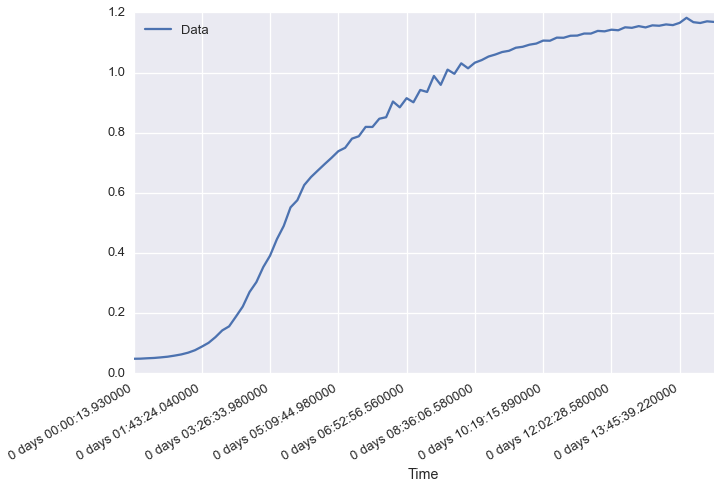

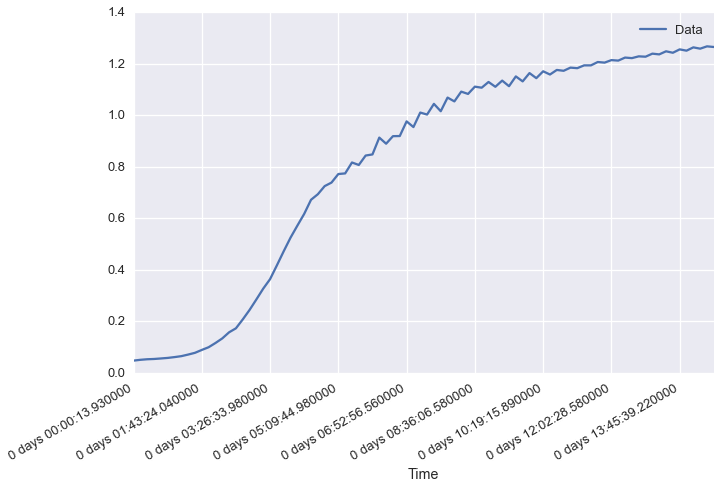

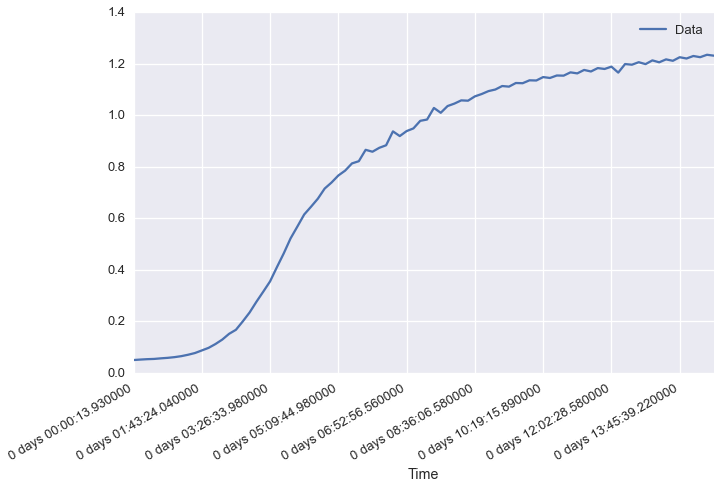

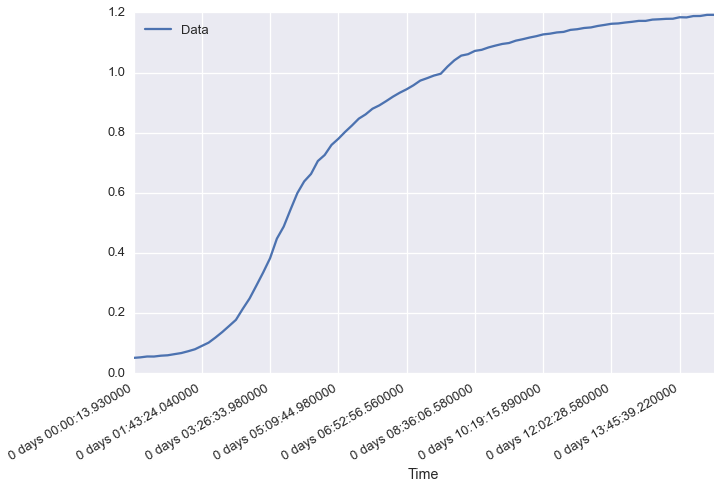

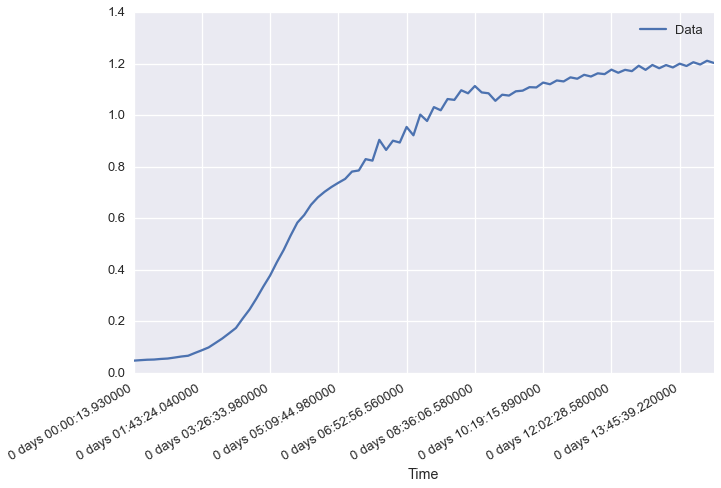

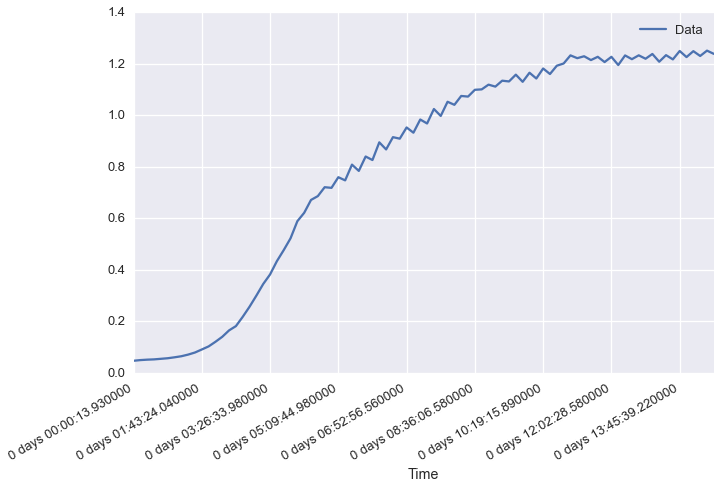

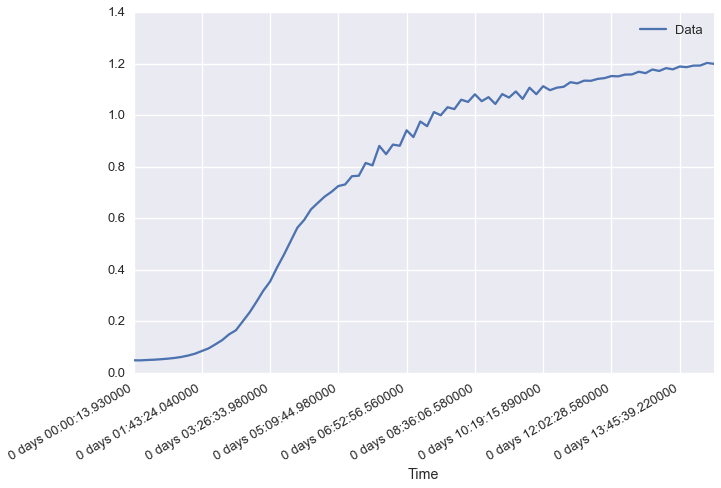

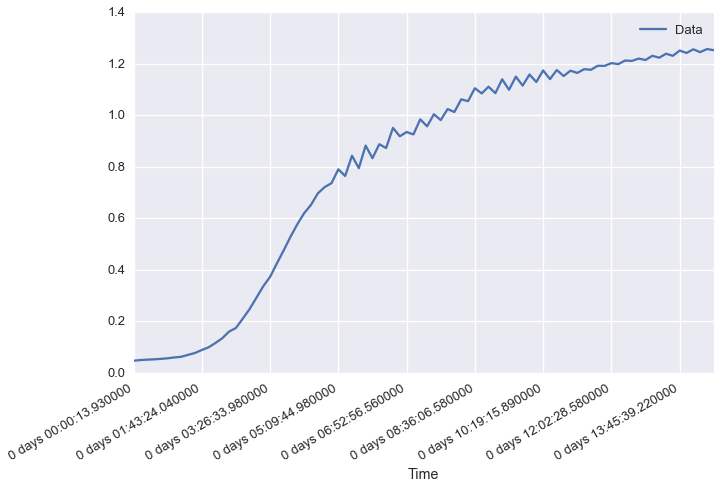

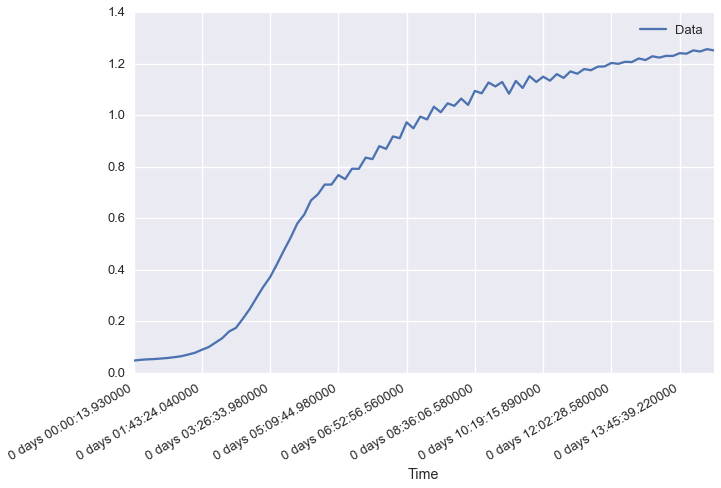

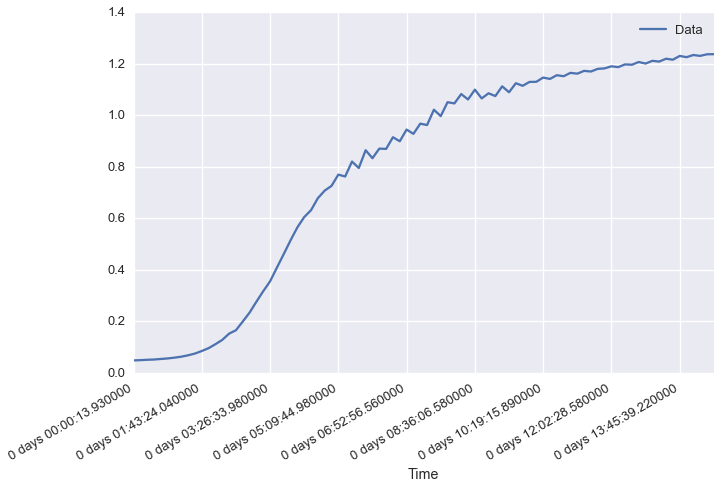

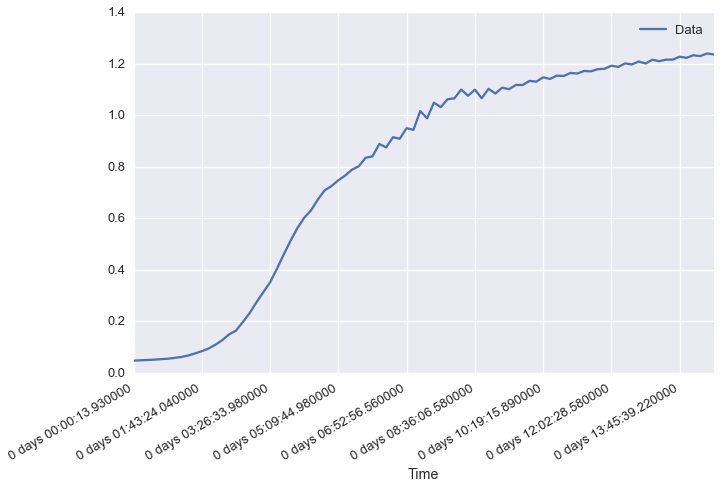

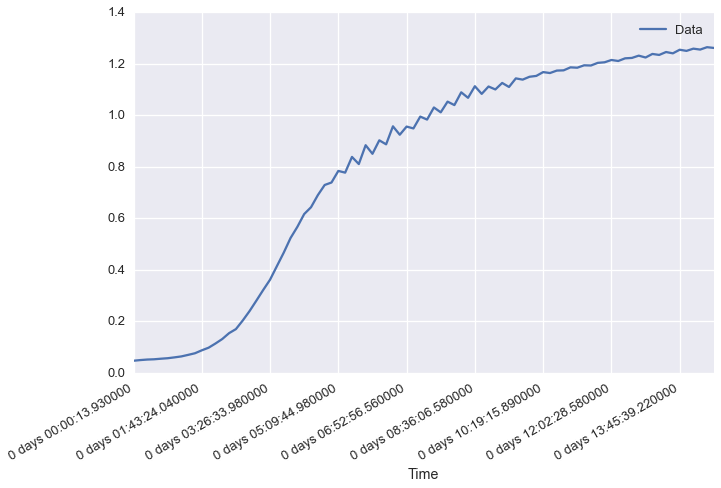

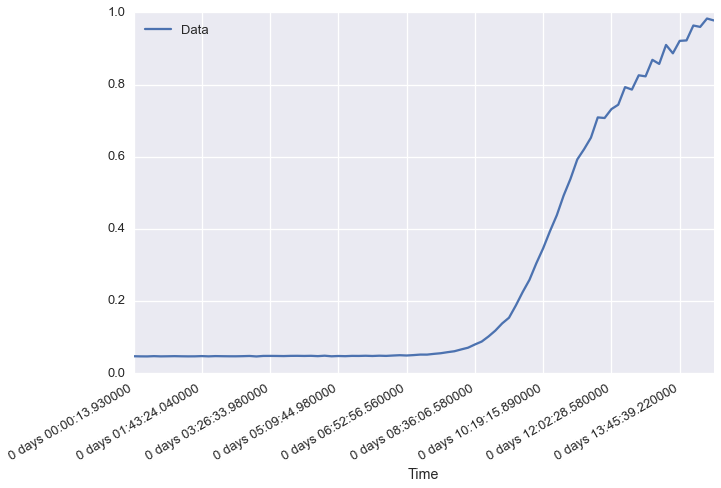

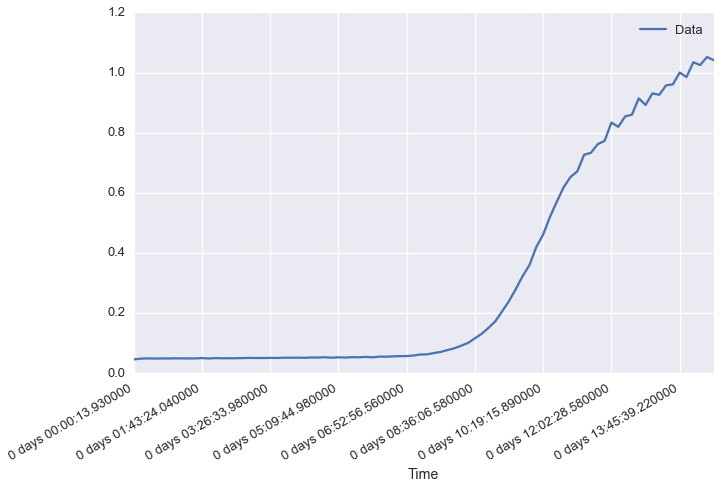

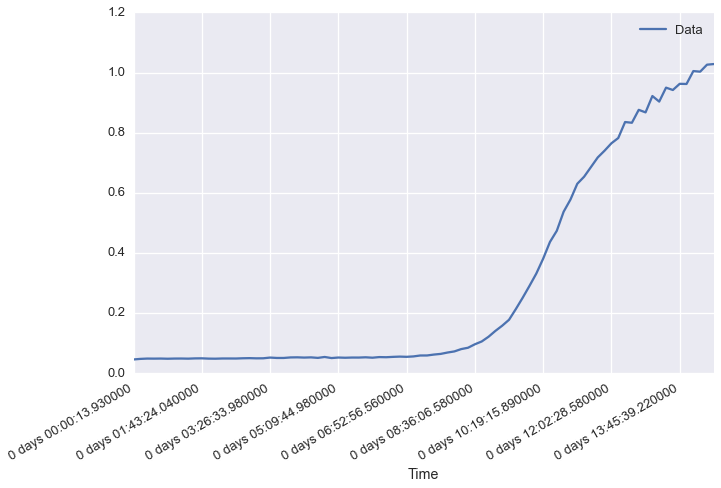

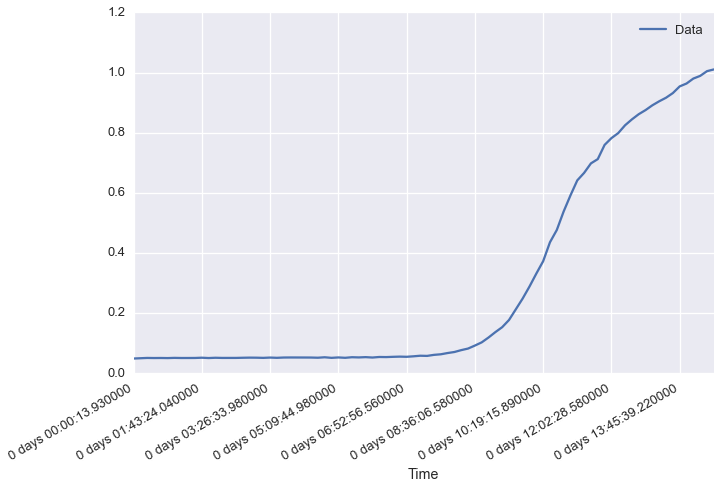

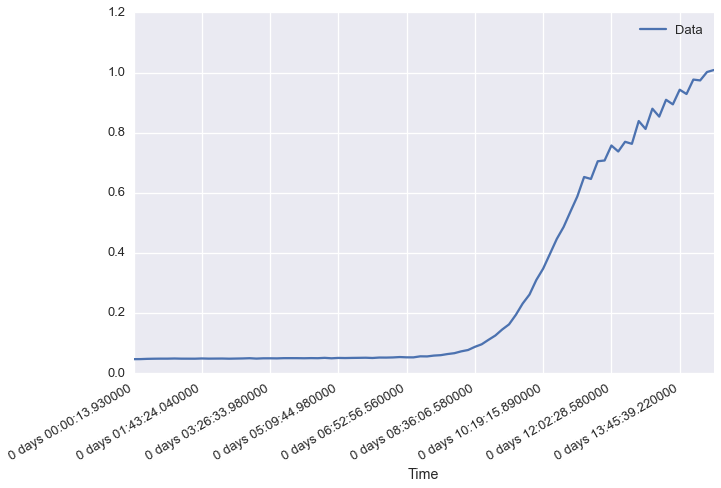

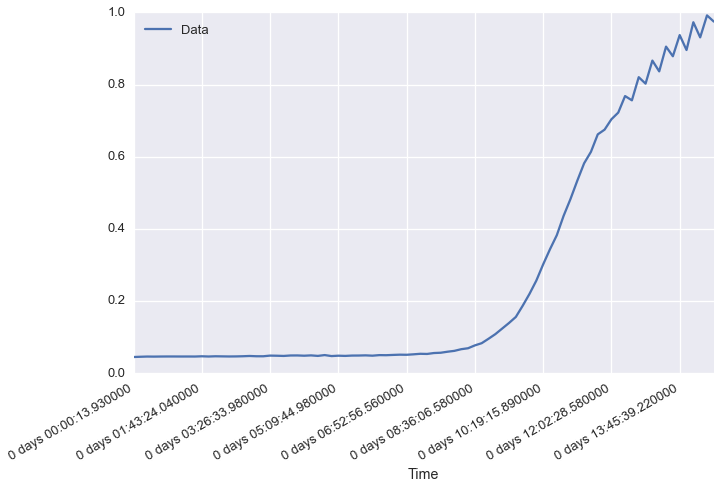

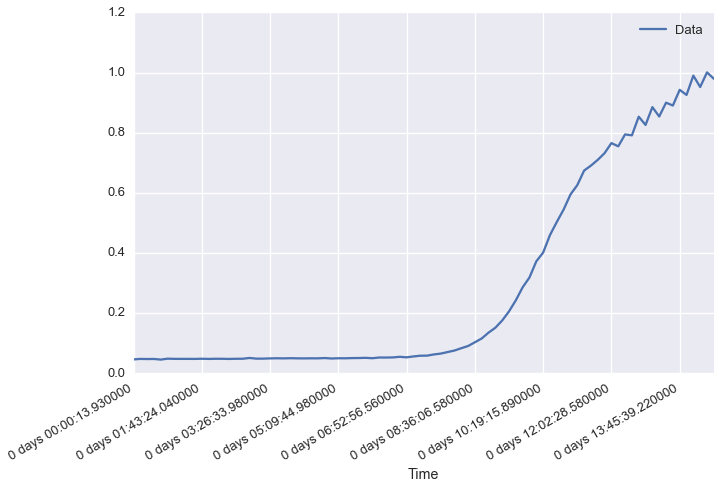

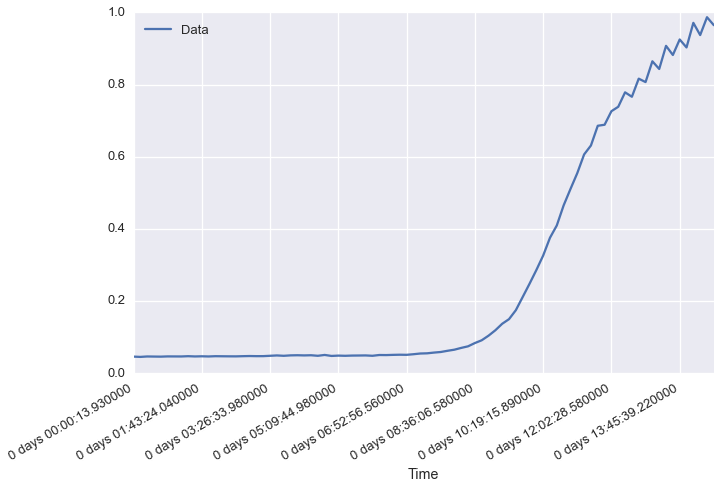

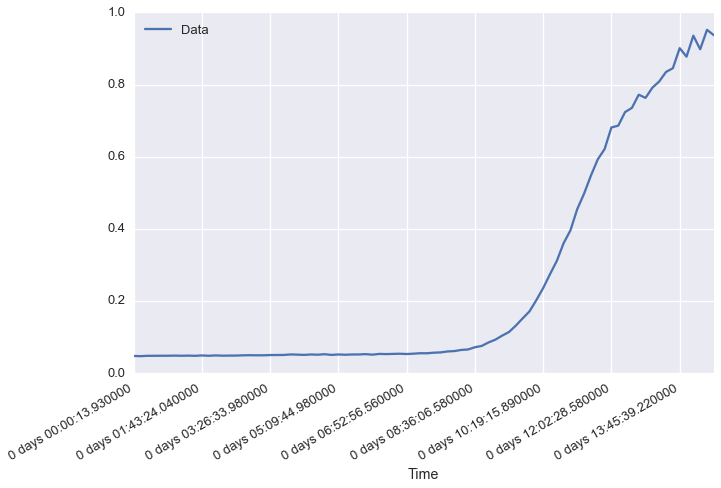

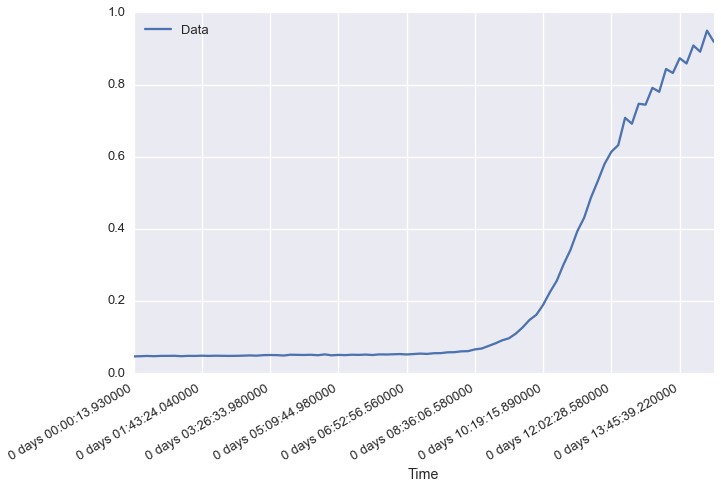

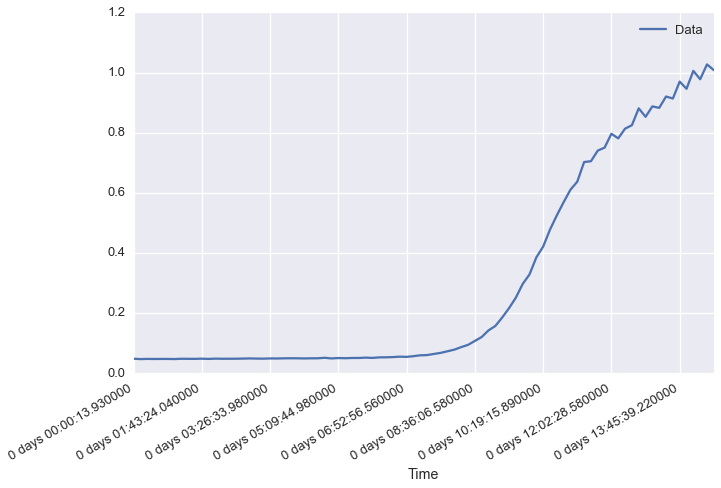

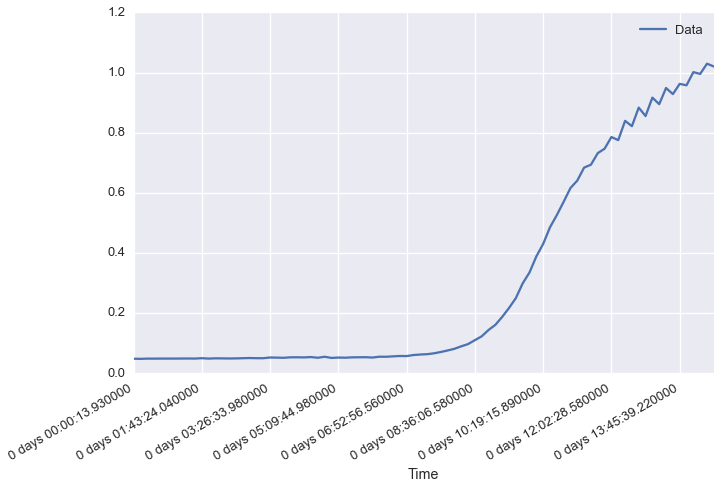

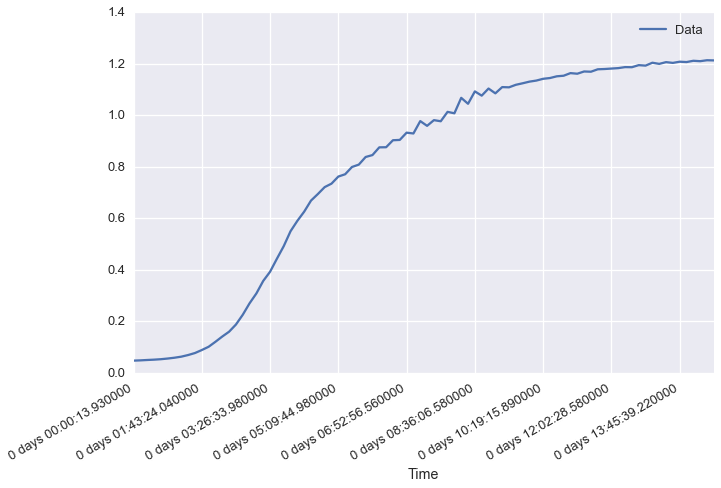

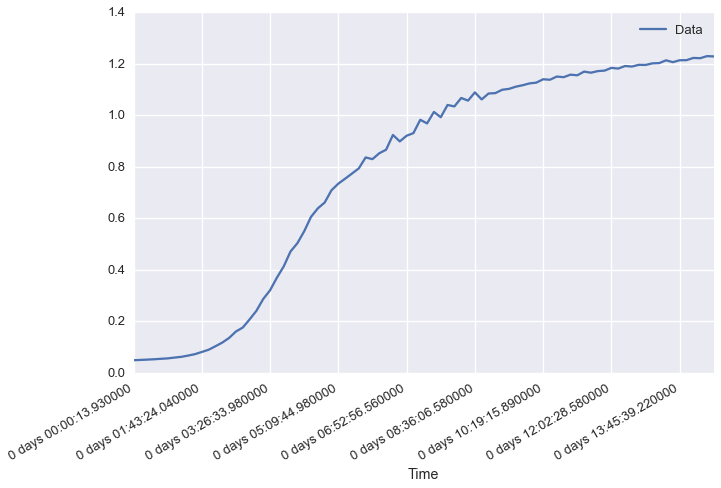

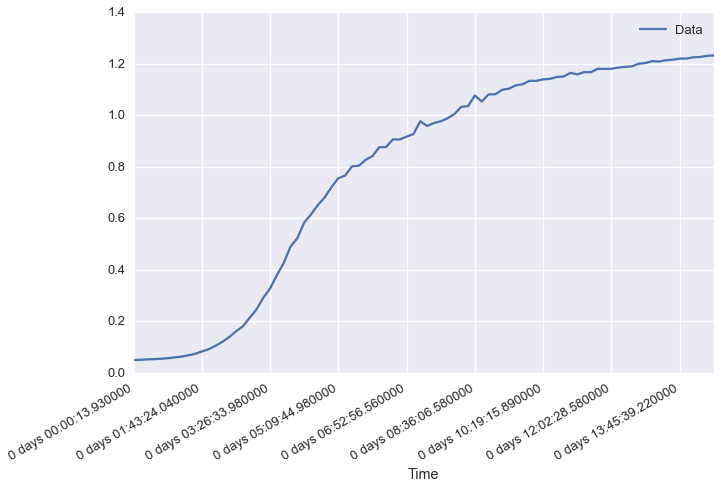

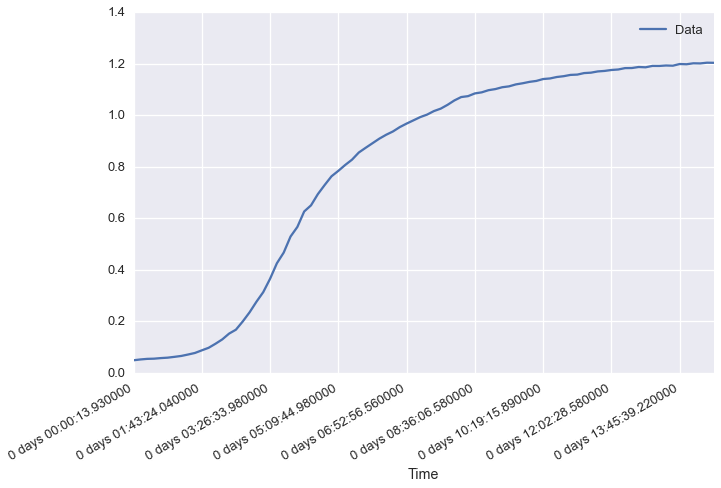

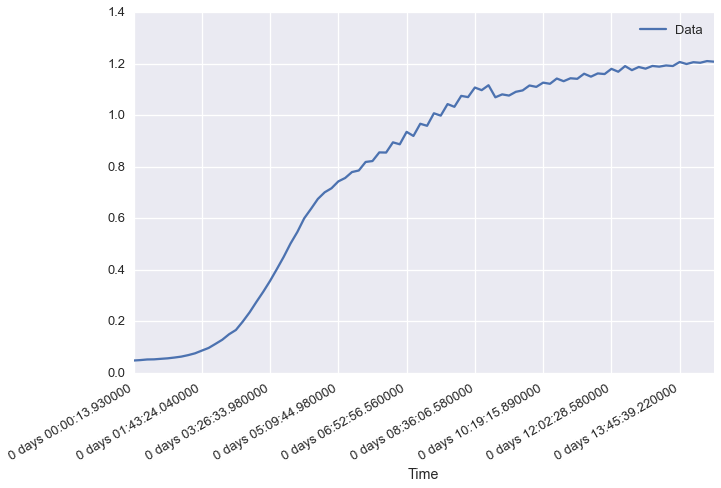

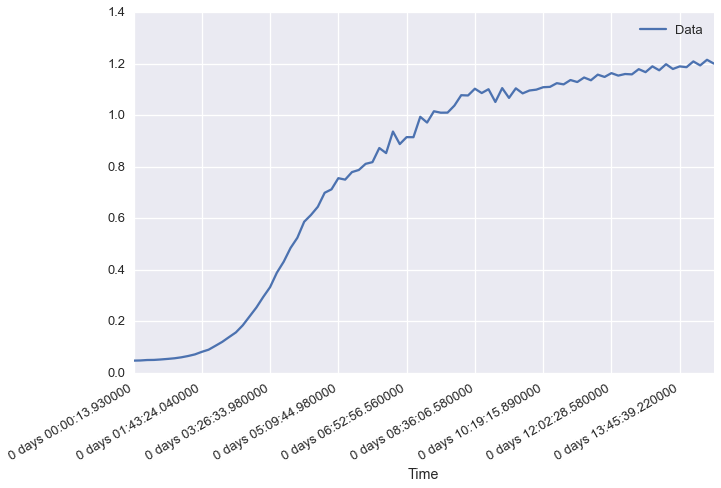

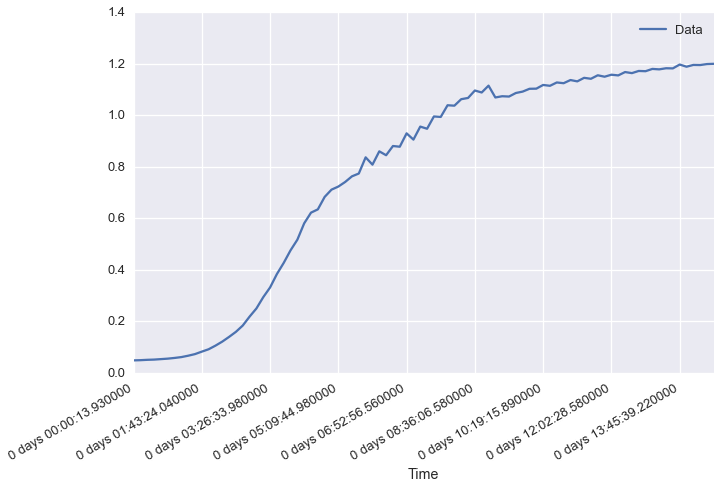

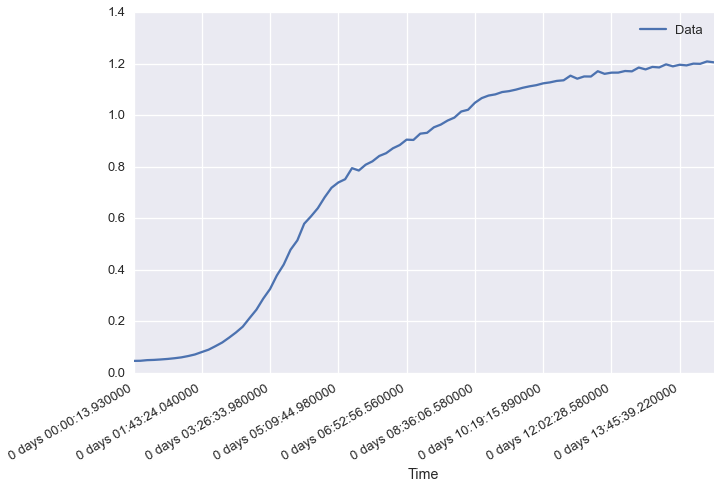

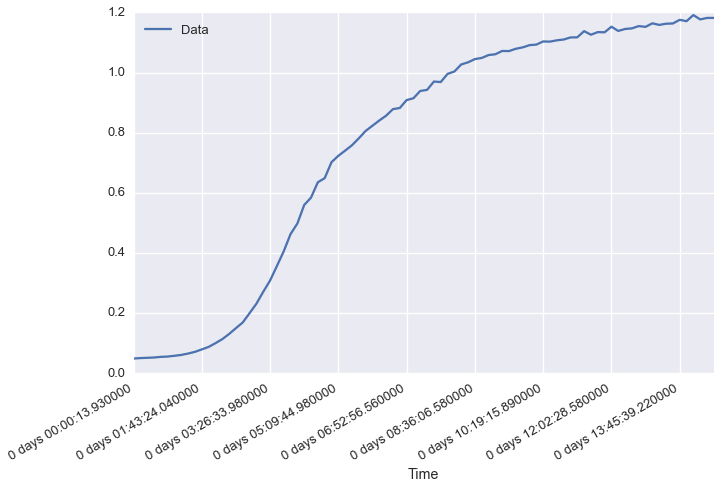

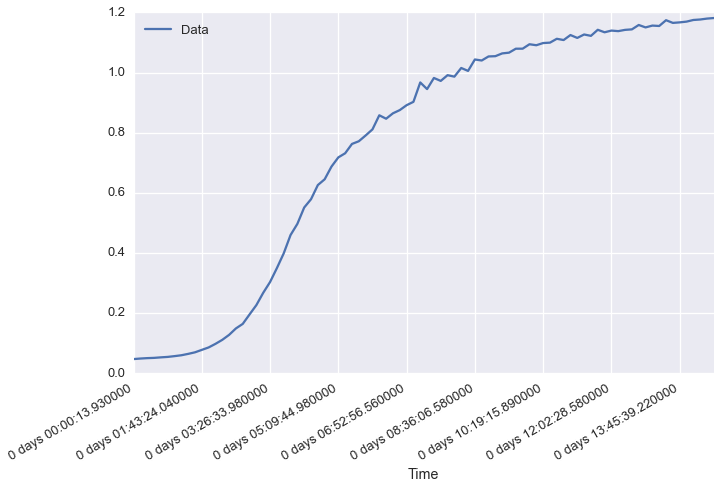

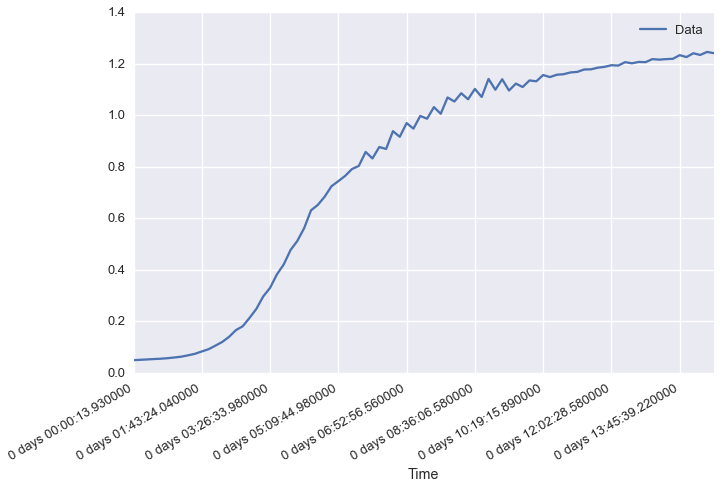

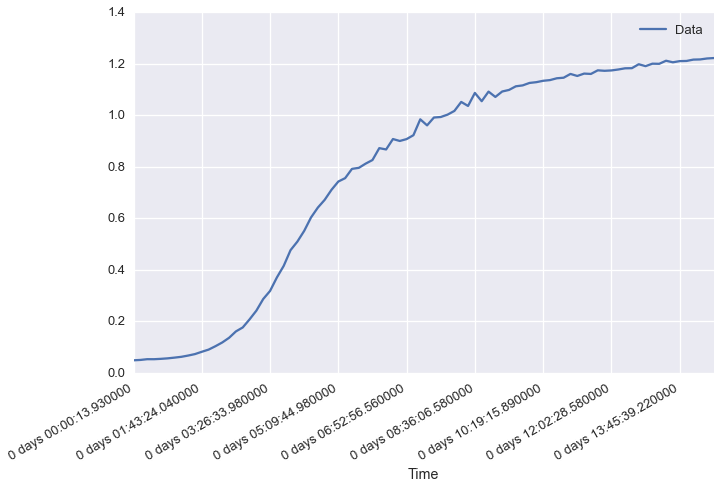

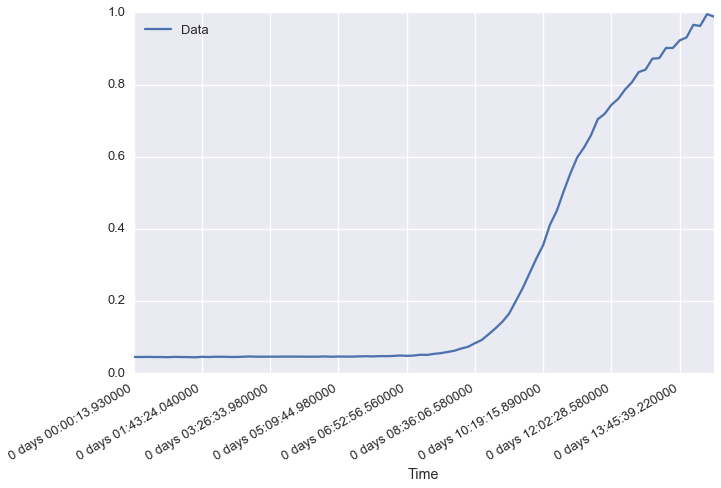

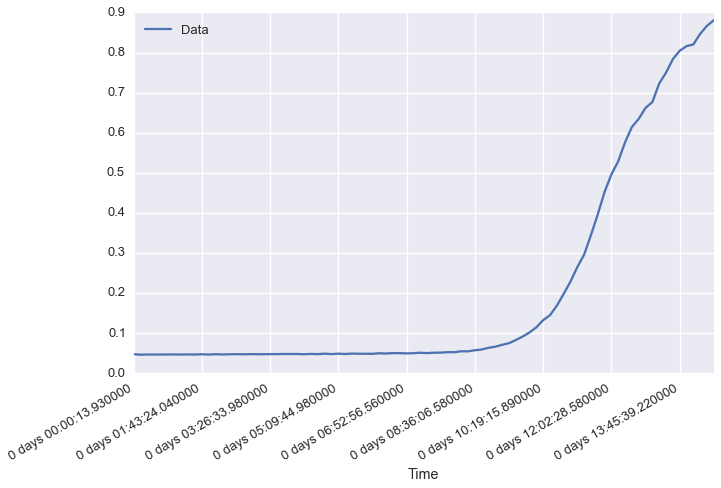

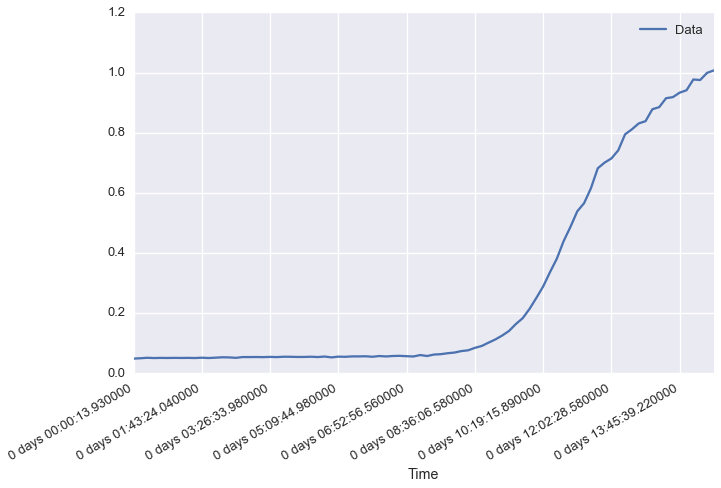

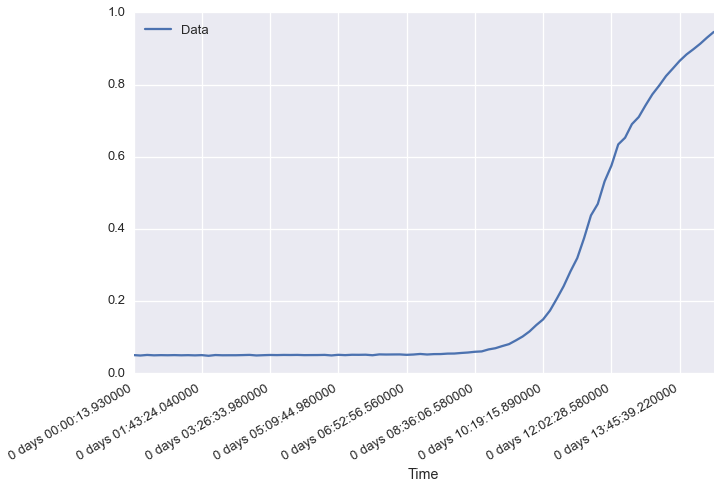

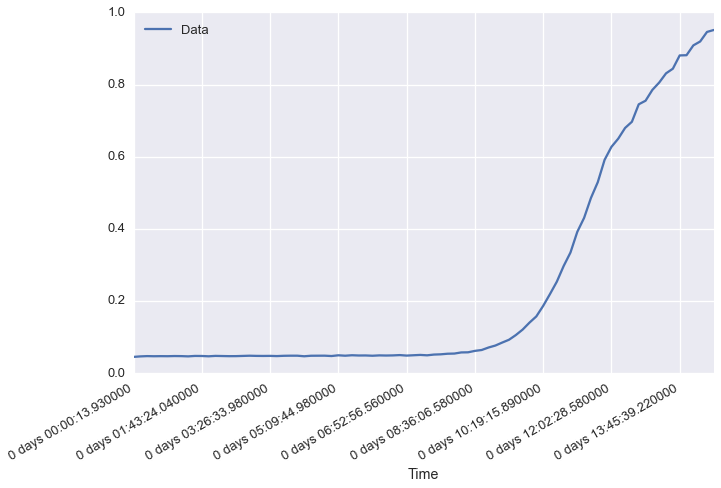

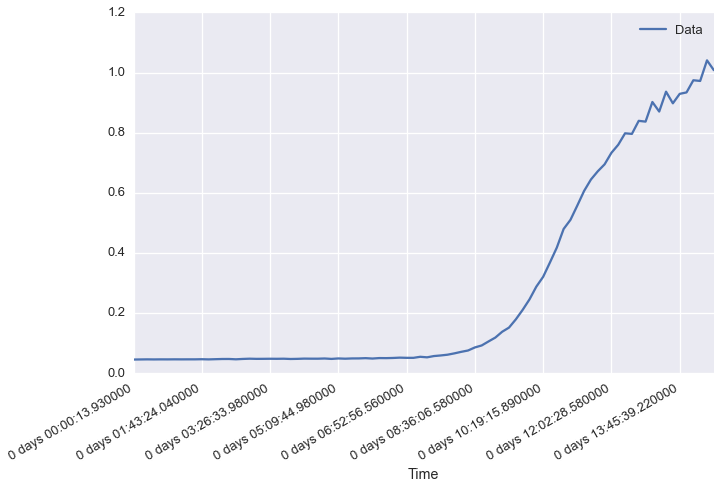

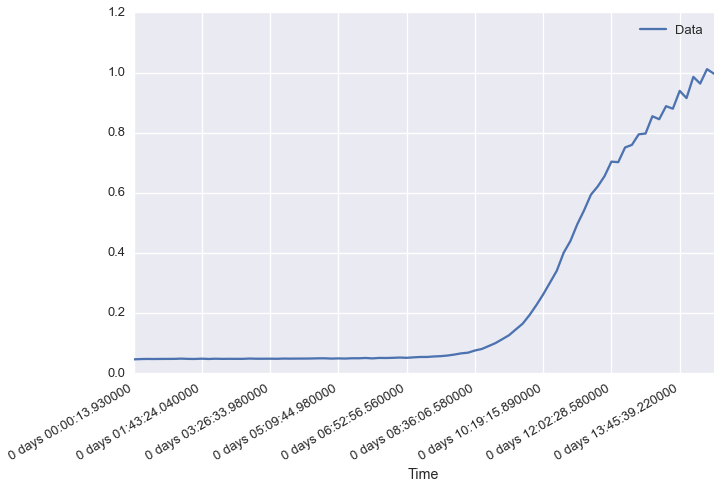

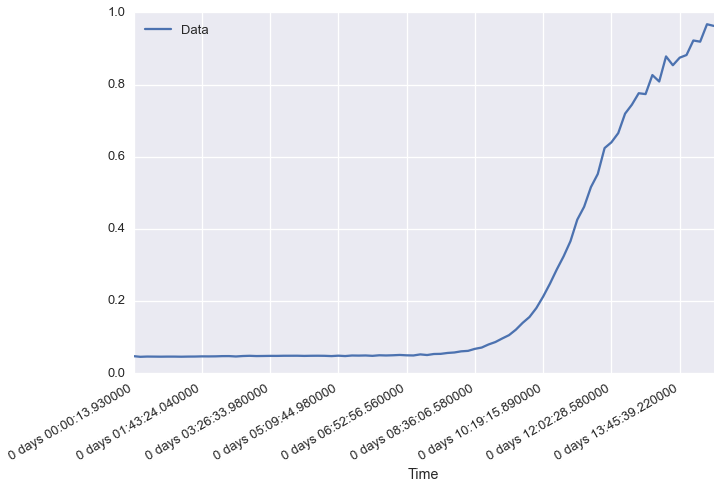

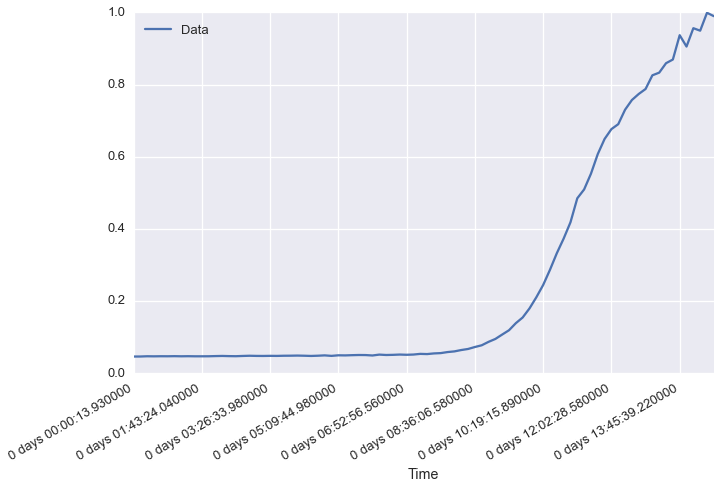

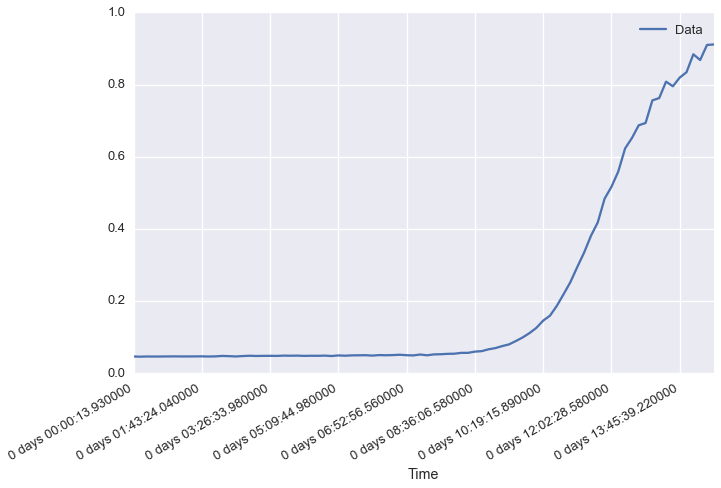

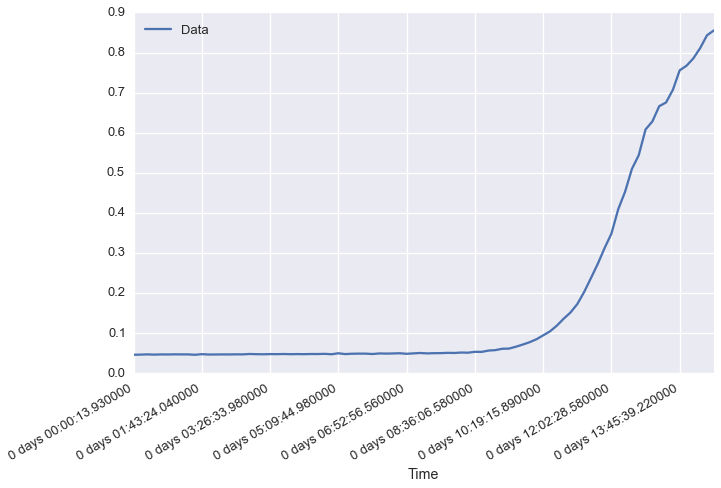

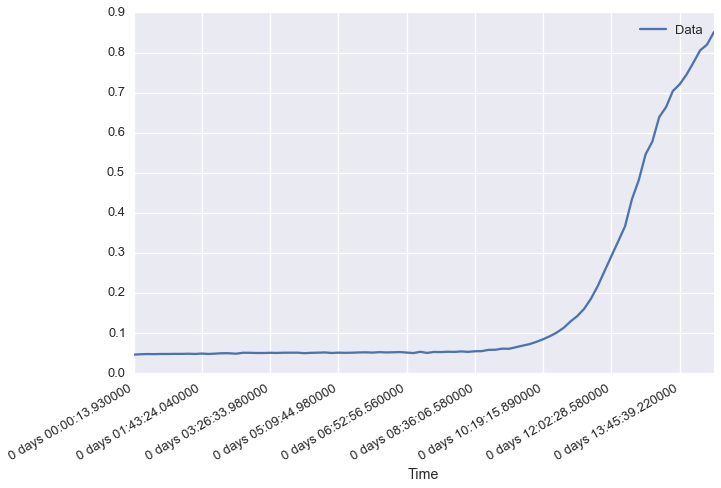

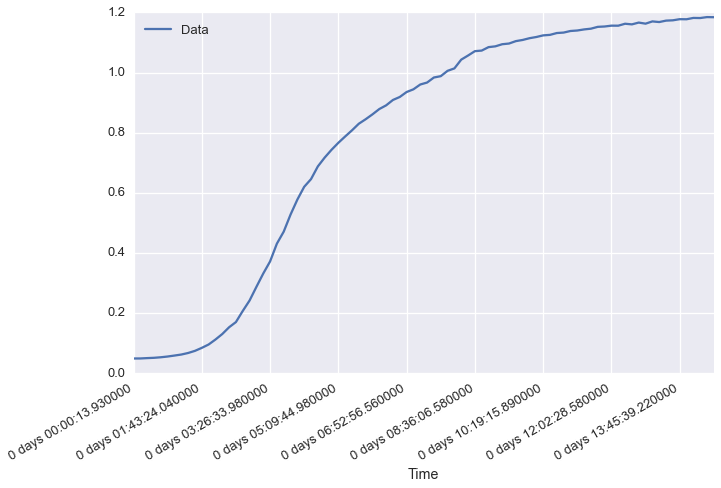

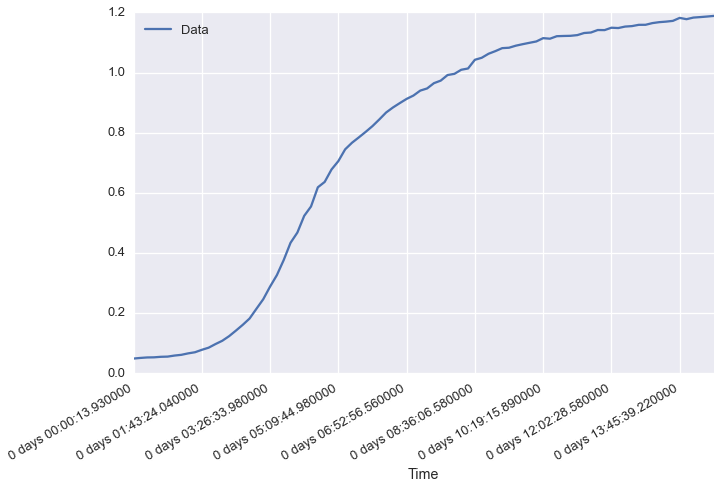

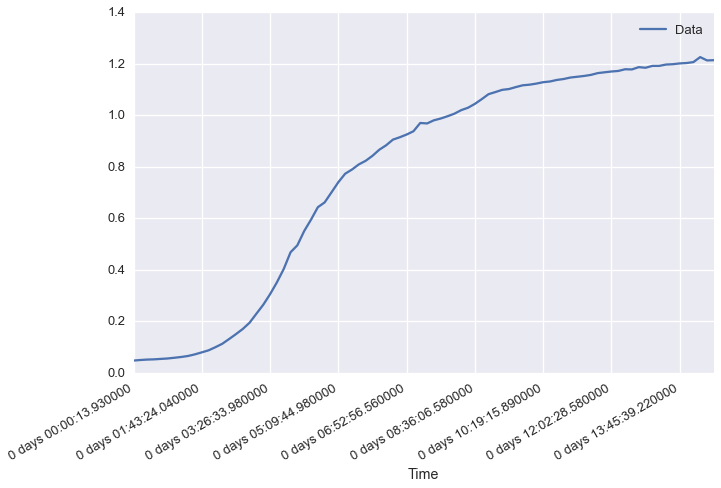

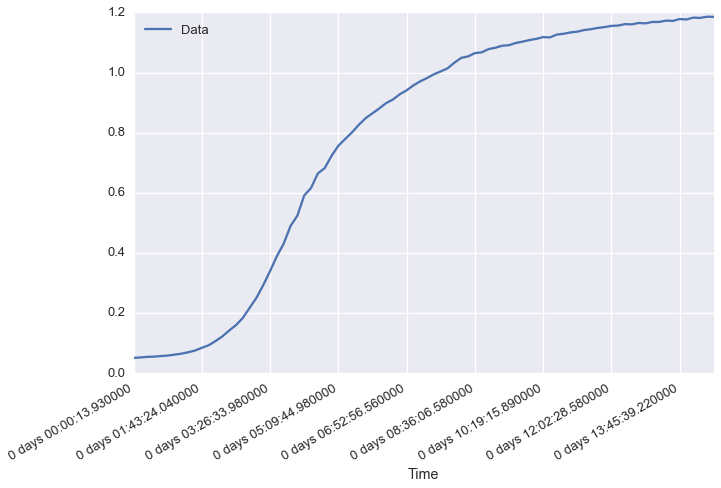

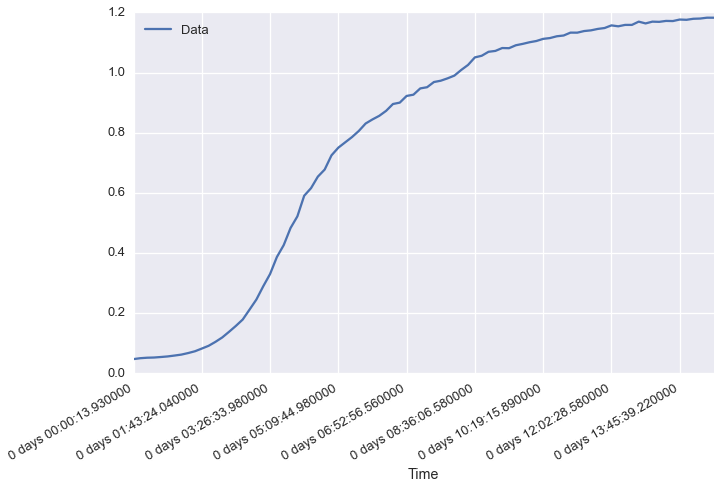

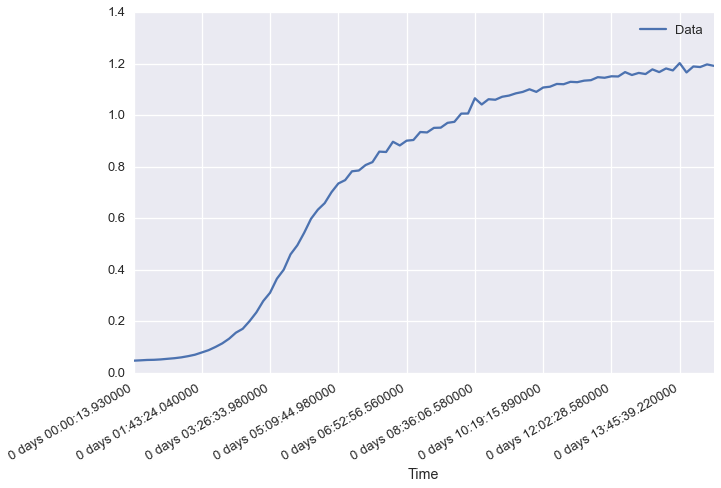

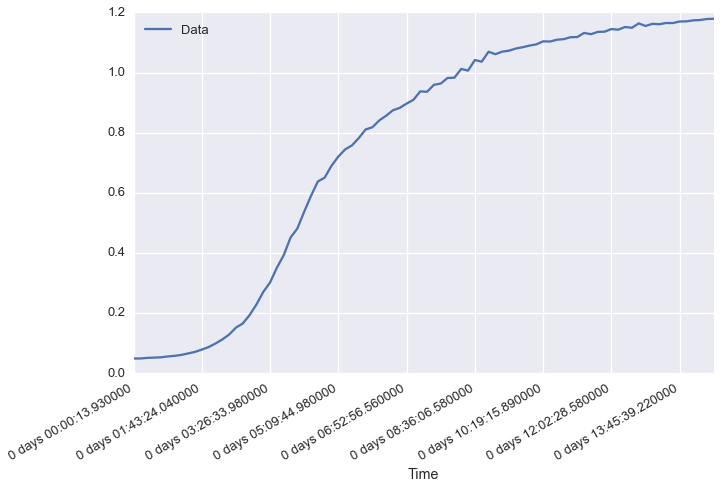

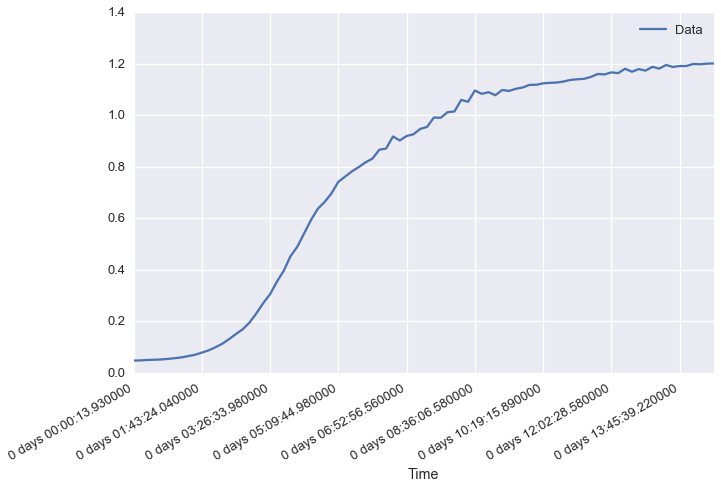

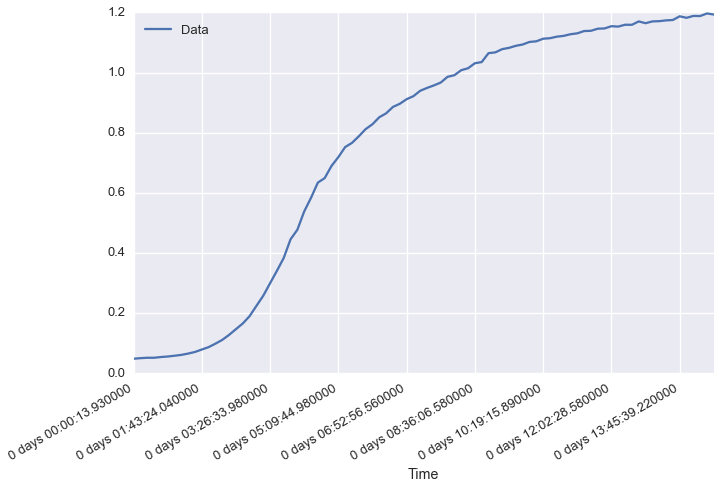

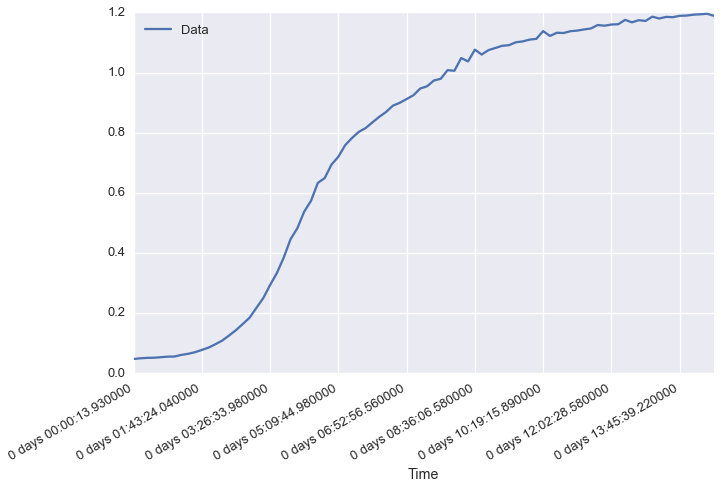

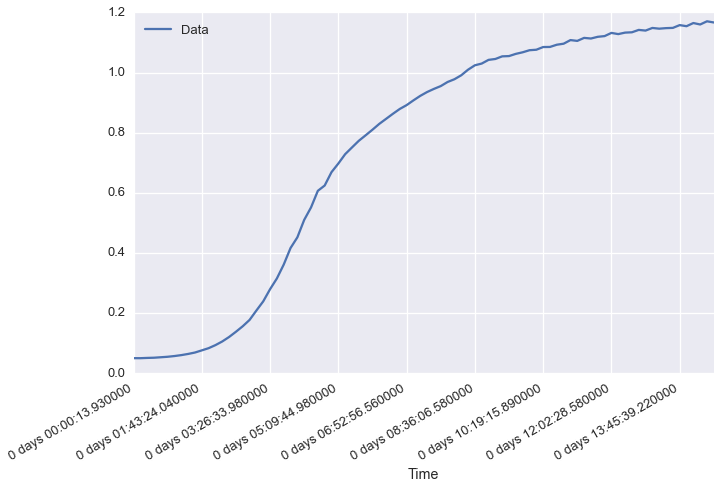

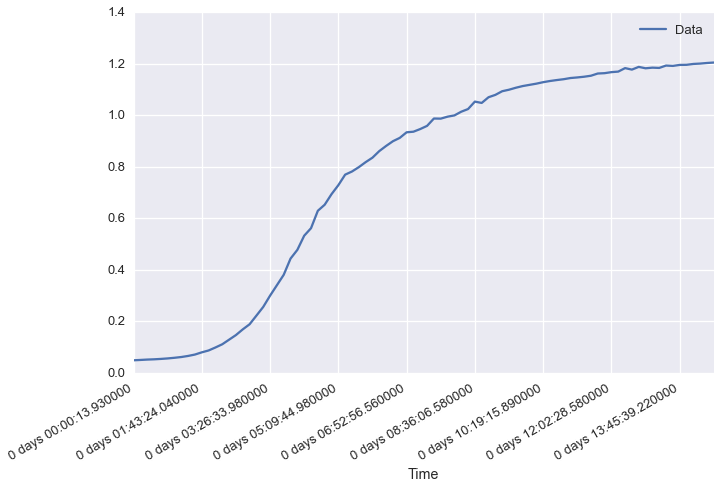

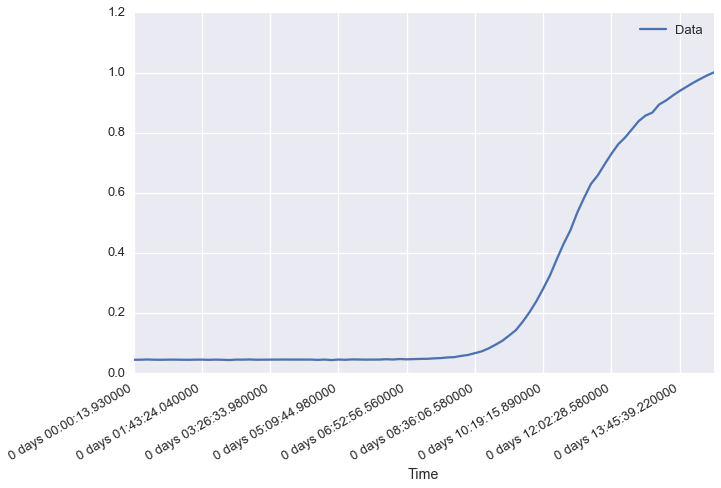

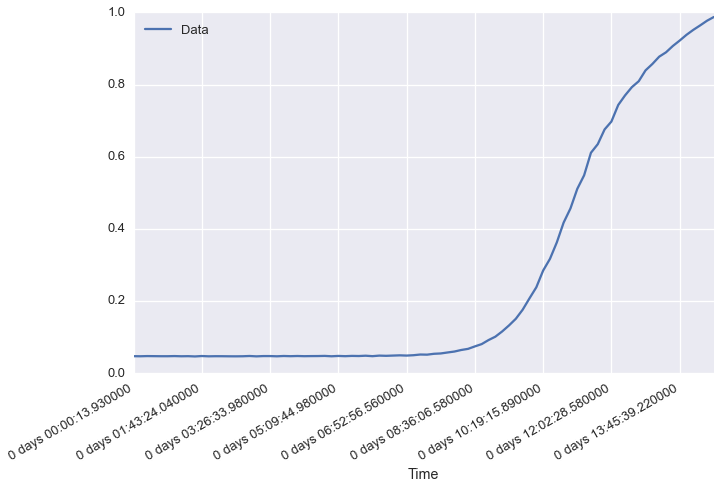

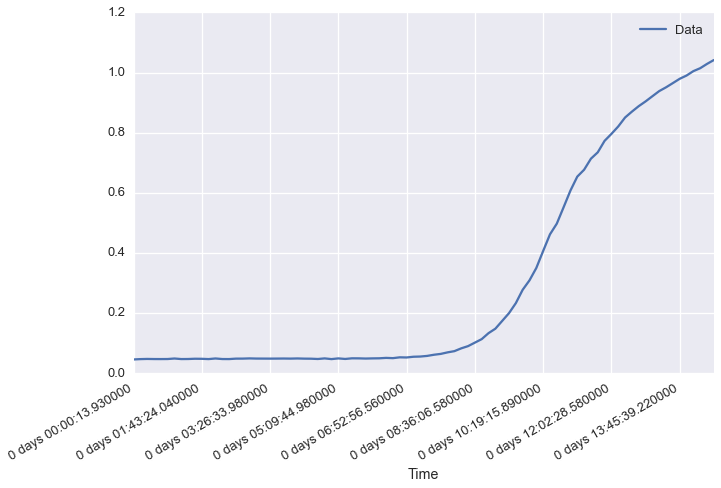

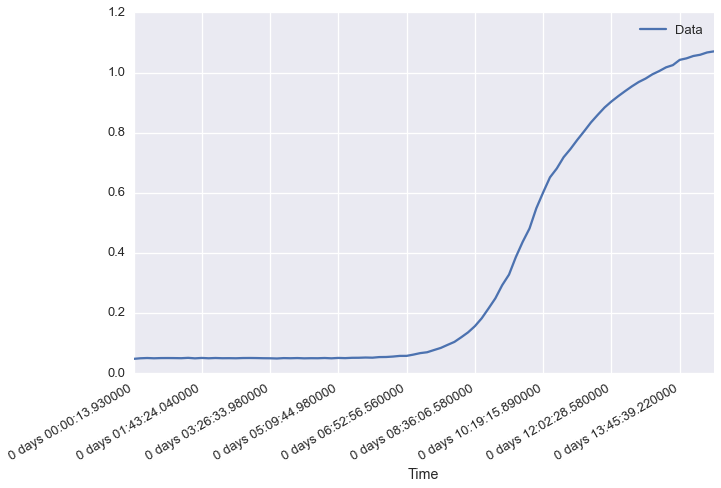

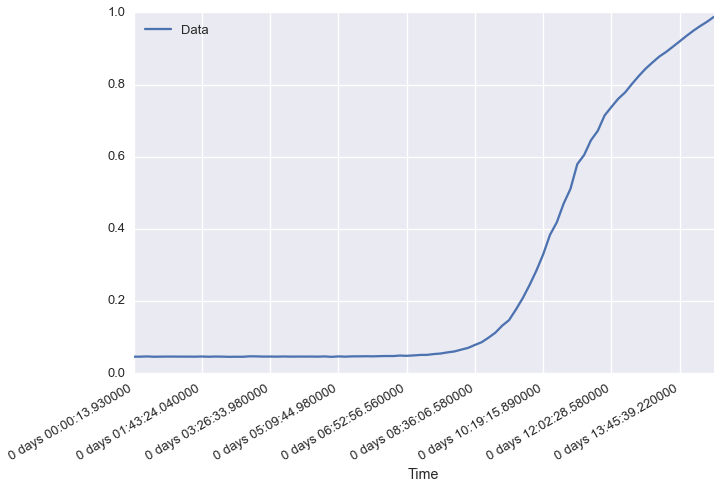

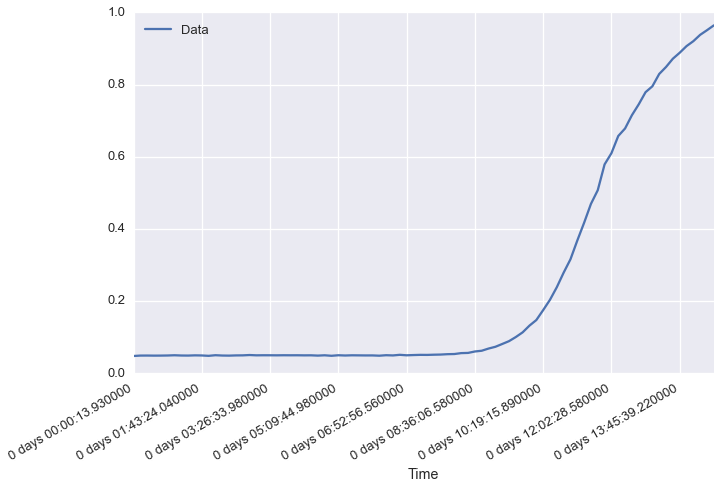

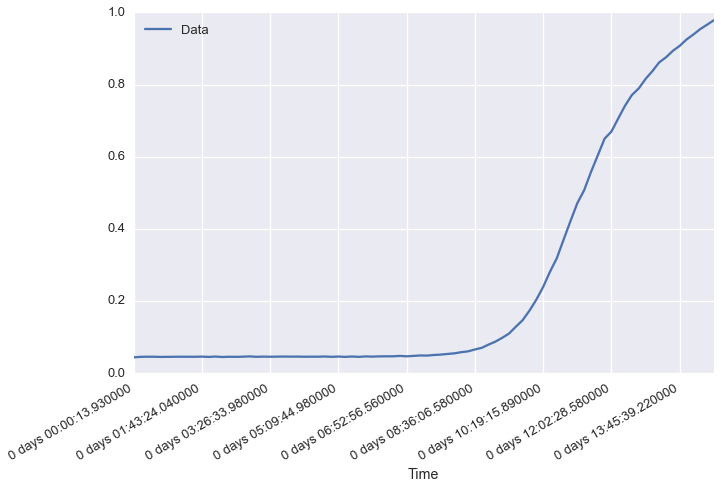

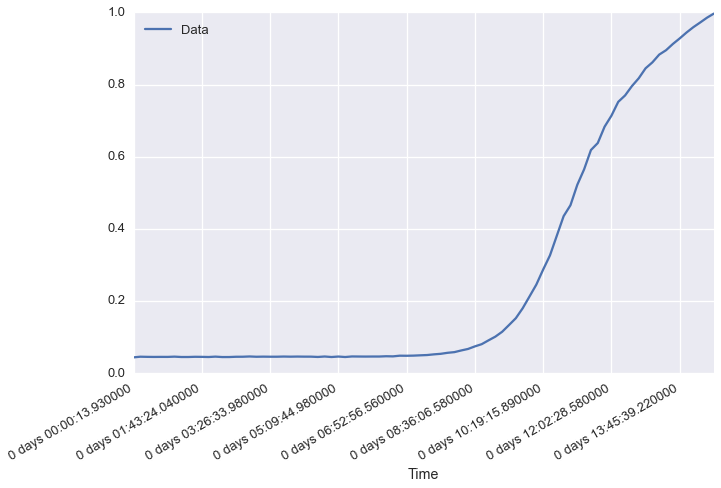

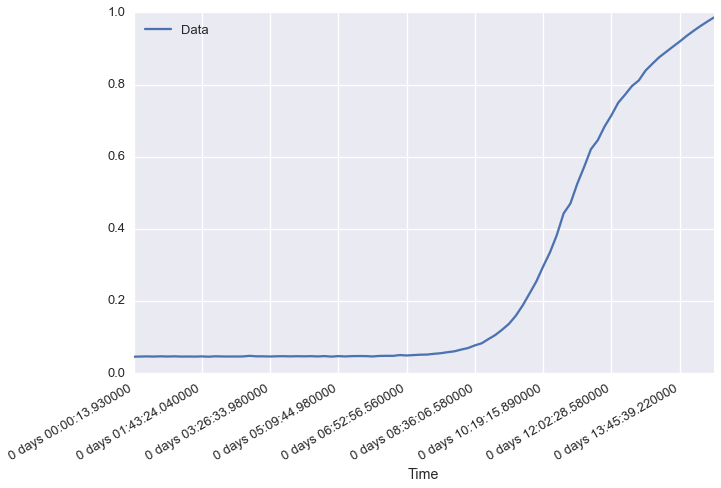

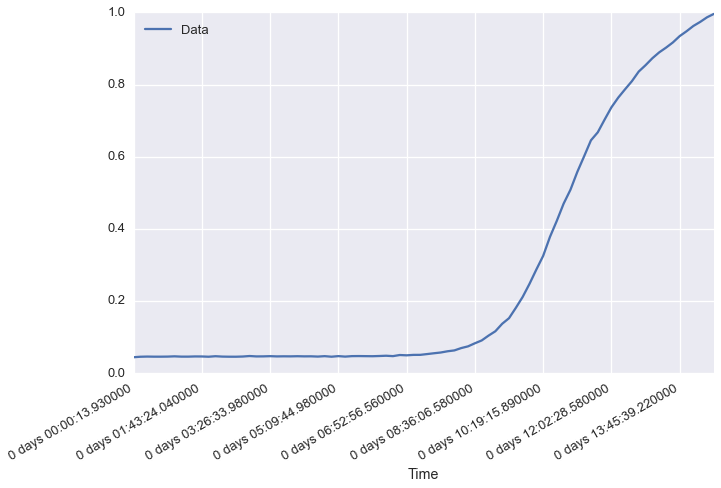

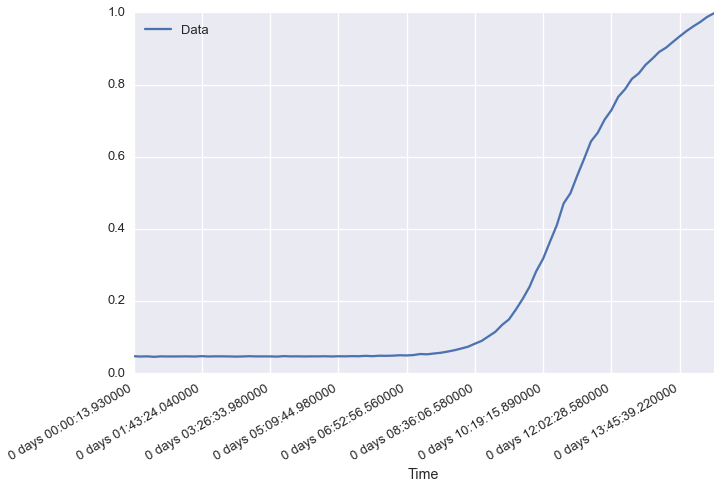

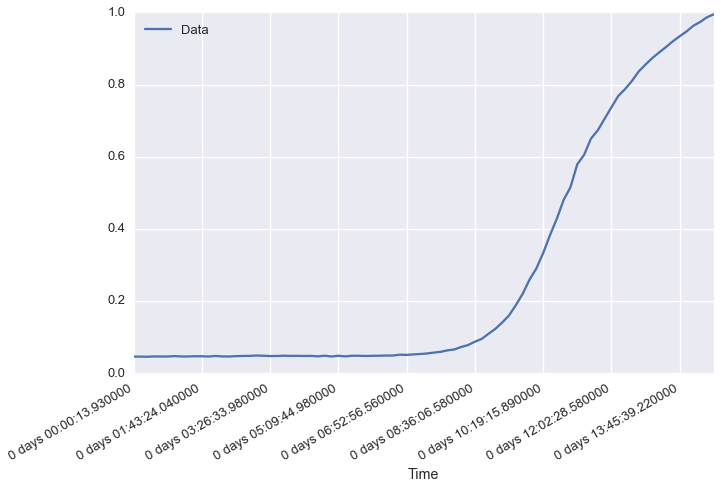

In [196]:
plt.figure(figsize=(12,12))
gd2.sort_values(['Well', 'MeasurementCount']).groupby('Well').plot(x='Time', y='Data')

In [197]:
gd

Plate  Repeat  MeasurementCount Well Type            Time  \
0         1       1                 1   A1    M 00:00:13.930000   
1         1       2                 3   A1    M 00:20:52.020000   
2         1       3                 5   A1    M 00:41:30.090000   
3         1       4                 7   A1    M        01:02:08   
4         1       5                 9   A1    M 01:22:46.200000   
5         1       6                11   A1    M 01:43:24.040000   
6         1       7                13   A1    M 02:04:02.400000   
7         1       8                15   A1    M 02:24:40.670000   
8         1       9                17   A1    M 02:45:18.150000   
9         1      10                19   A1    M 03:05:56.150000   
10        1      11                21   A1    M 03:26:33.980000   
11        1      12                23   A1    M 03:47:12.190000   
12        1      13                25   A1    M 04:07:49.870000   
13        1      14                27   A1    M 04:28:28.050000   
14        1      15                29   A1    M 04:49:06.880000   
15        1      16                31   A1    M 05:09:44.980000   
16        1      17                33   A1    M 05:30:23.810000   
17        1      18                35   A1    M 05:51:02.610000   
18        1      19                37   A1    M 06:11:40.960000   
19        1      20                39   A1    M 06:32:18.880000   
20        1      21                41   A1    M 06:52:56.560000   
21        1      22                43   A1    M 07:13:34.680000   
22        1      23                45   A1    M 07:34:12.660000   
23        1      24                47   A1    M 07:54:50.490000   
24        1      25                49   A1    M 08:15:28.290000   
25        1      26                51   A1    M 08:36:06.580000   
26        1      27                53   A1    M 08:56:45.140000   
27        1      28                55   A1    M 09:17:22.930000   
28        1      29                57   A1    M 09:38:00.690000   
29        1      30                59   A1    M 09:58:38.530000   
...     ...     ...               ...  ...  ...             ...   
8226      1      14                28  H12    M 04:38:44.080000   
8227      1      15                30  H12    M 04:59:22.490000   
8228      1      16                32  H12    M 05:20:01.040000   
8229      1      17                34  H12    M 05:40:39.890000   
8230      1      18                36  H12    M 06:01:18.210000   
8231      1      19                38  H12    M 06:21:56.460000   
8232      1      20                40  H12    M 06:42:34.400000   
8233      1      21                42  H12    M 07:03:12.130000   
8234      1      22                44  H12    M 07:23:50.260000   
8235      1      23                46  H12    M 07:44:28.110000   
8236      1      24                48  H12    M 08:05:05.910000   
8237      1      25                50  H12    M 08:25:44.210000   
8238      1      26                52  H12    M 08:46:22.020000   
8239      1      27                54  H12    M 09:07:00.540000   
8240      1      28                56  H12    M 09:27:38.440000   
8241      1      29                58  H12    M 09:48:16.120000   
8242      1      30                60  H12    M 10:08:53.900000   
8243      1      31                62  H12    M 10:29:31.780000   
8244      1      32                64  H12    M 10:50:10.610000   
8245      1      33                66  H12    M 11:10:48.400000   
8246      1      34                68  H12    M 11:31:27.050000   
8247      1      35                70  H12    M 11:52:05.510000   
8248      1      36                72  H12    M 12:12:44.090000   
8249      1      37                74  H12    M 12:33:22.230000   
8250      1      38                76  H12    M 12:54:00.420000   
8251      1      39                78  H12    M 13:14:38.610000   
8252      1      40                80  H12    M 13:35:16.670000   
8253      1      41                82  H12    M 13:55